**Importacion bibliotecas**

In [2]:
# Bibliotecas básicas para análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm  # Barras de progreso para notebooks
import math
# Configuración para visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'

# Para análisis estadístico
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer

# Para validación cruzada específica de series temporales
from sklearn.model_selection import TimeSeriesSplit

# Para análisis de series temporales
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from prophet import Prophet  # Facebook Prophet para forecasting

# Para manejo de fechas
from datetime import datetime, timedelta
import calendar

# Para análisis de componentes principales
from sklearn.decomposition import PCA

# Para informes automáticos de EDA
try:
    profiling_available = True
except ImportError:
    profiling_available = False
    
# Para visualizaciones interactivas
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import plotly.figure_factory as ff
    plotly_available = True
except ImportError:
    plotly_available = False

# Para análisis probabilístico
from scipy.stats import poisson, norm, gamma, nbinom

# Para guardar y cargar modelos
import pickle
import joblib
import os

# Para ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

# Para configurar la visualización de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

print(" Bibliotecas importadas correctamente para análisis avanzado y modelado predictivo de goles.")

 Bibliotecas importadas correctamente para análisis avanzado y modelado predictivo de goles.


**Carga de datos**

In [5]:
# Definir la ruta del archivo
ruta_goleadores = "data/Goleadores_Unificados.csv"

# Cargar dataset con manejo de codificación
try:
    # Intentar cargar con codificación UTF-8
    df_goleadores = pd.read_csv(ruta_goleadores, encoding='utf-8')
    print("Archivo cargado correctamente con codificación UTF-8.")
except UnicodeDecodeError:
    # Si falla, intentar con latin-1
    df_goleadores = pd.read_csv(ruta_goleadores, encoding='latin-1')
    print("Archivo cargado correctamente con codificación latin-1.")

# Información básica sobre el dataset
print("\n--- INFORMACIÓN DEL DATASET DE GOLEADORES ---")
print(f"Número de filas: {df_goleadores.shape[0]}")
print(f"Número de columnas: {df_goleadores.shape[1]}")

# Mostrar las primeras filas del dataset
print("\n--- PRIMERAS FILAS DEL DATASET DE GOLEADORES ---")
display(df_goleadores.head(3))

# Información sobre los tipos de datos
print("\n--- TIPOS DE DATOS EN EL DATASET DE GOLEADORES ---")
display(df_goleadores.dtypes)

# Verificar valores nulos
print("\n--- VALORES NULOS EN EL DATASET DE GOLEADORES ---")
display(df_goleadores.isnull().sum())

Archivo cargado correctamente con codificación UTF-8.

--- INFORMACIÓN DEL DATASET DE GOLEADORES ---
Número de filas: 662
Número de columnas: 31

--- PRIMERAS FILAS DEL DATASET DE GOLEADORES ---


,Jugador,Temporada,Fecha,Competición,Equipo,Oponente,Resultado,Goles,Asistencias,partido,Día de la semana,Ronda o Fase,Sede,Titular,Posición,Minutos,Penales marcados,Penales intentados,Tiros totales,Tiros a puerta,Tarjetas amarillas,Tarjetas rojas,Faltas cometidas,Faltas recibidas,Fuera de juego,Centros,Entradas ganadas,Intercepciones,Goles en propia,Penales ganados,Penales concedidos
0,Carlos_Bacca,2022,2022-01-08,La Liga,Granada,Barcelona,D 1–1,0,0,1,Sat,Matchweek 20,Home,N,FW,7,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0
1,Carlos_Bacca,2022,2022-01-20,La Liga,Granada,Getafe,L 2–4,0,0,2,Thu,Matchweek 21,Away,N,RM,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Carlos_Bacca,2022,2022-01-23,La Liga,Granada,Osasuna,L 0–2,0,0,3,Sun,Matchweek 22,Home,N,LW,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0



--- TIPOS DE DATOS EN EL DATASET DE GOLEADORES ---


Jugador               object
Temporada              int64
Fecha                 object
Competición           object
Equipo                object
Oponente              object
Resultado             object
Goles                  int64
Asistencias            int64
partido                int64
Día de la semana      object
Ronda o Fase          object
Sede                  object
Titular               object
Posición              object
Minutos                int64
Penales marcados       int64
Penales intentados     int64
Tiros totales          int64
Tiros a puerta         int64
Tarjetas amarillas     int64
Tarjetas rojas         int64
Faltas cometidas       int64
Faltas recibidas       int64
Fuera de juego         int64
Centros                int64
Entradas ganadas       int64
Intercepciones         int64
Goles en propia        int64
Penales ganados        int64
Penales concedidos     int64
dtype: object


--- VALORES NULOS EN EL DATASET DE GOLEADORES ---


Jugador                0
Temporada              0
Fecha                  0
Competición            0
Equipo                 0
Oponente               0
Resultado              0
Goles                  0
Asistencias            0
partido                0
Día de la semana       0
Ronda o Fase           0
Sede                   0
Titular                0
Posición              83
Minutos                0
Penales marcados       0
Penales intentados     0
Tiros totales          0
Tiros a puerta         0
Tarjetas amarillas     0
Tarjetas rojas         0
Faltas cometidas       0
Faltas recibidas       0
Fuera de juego         0
Centros                0
Entradas ganadas       0
Intercepciones         0
Goles en propia        0
Penales ganados        0
Penales concedidos     0
dtype: int64

**Limpieza de datos**

In [6]:
# Función para mostrar información resumida de un DataFrame
def mostrar_info_resumida(df, nombre):
    print(f"\n----- Resumen de {nombre} -----")
    print(f"Dimensiones: {df.shape}")
    print("\nColumnas únicas:")
    for col in df.columns:
        if df[col].dtype == 'object':
            print(f"{col}: {df[col].nunique()} valores únicos")
    
    print("\nEstadísticas descriptivas para columnas numéricas:")
    display(df.describe())

# Limpieza del DataFrame de Goleadores
def limpiar_goleadores(df):
    df_limpio = df.copy()
    
    # Eliminar columnas específicas
    columnas_a_eliminar = ['Resultado', 'Ronda o fase', 'Posición', 'Partido']
    columnas_a_eliminar = [col for col in columnas_a_eliminar if col in df_limpio.columns]
    if columnas_a_eliminar:
        df_limpio = df_limpio.drop(columns=columnas_a_eliminar)
        print(f"Columnas eliminadas: {columnas_a_eliminar}")
    
    # Convertir fechas a formato datetime
    if 'Fecha' in df_limpio.columns:
        df_limpio['Fecha'] = pd.to_datetime(df_limpio['Fecha'], errors='coerce')
        
        # Crear columna de año y mes para facilitar análisis temporales
        df_limpio['Año'] = df_limpio['Fecha'].dt.year
        df_limpio['Mes'] = df_limpio['Fecha'].dt.month
    
    # Estandarizar nombres de equipos y oponentes
    if 'Equipo' in df_limpio.columns:
        df_limpio['Equipo'] = df_limpio['Equipo'].str.upper()
    
    if 'Oponente' in df_limpio.columns:
        df_limpio['Oponente'] = df_limpio['Oponente'].str.upper()
    
    # Crear columna de eficiencia ofensiva (goles / tiros totales)
    if 'Goles' in df_limpio.columns and 'Tiros totales' in df_limpio.columns:
        # Evitar división por cero
        df_limpio['Eficiencia_Ofensiva'] = np.where(
            df_limpio['Tiros totales'] > 0,
            df_limpio['Goles'] / df_limpio['Tiros totales'],
            0
        )
    
    return df_limpio

# Definir la ruta del archivo
ruta_goleadores = "data/Goleadores_Unificados.csv"

# Cargar dataset con manejo de codificación
try:
    # Intentar cargar con codificación UTF-8
    df_goleadores = pd.read_csv(ruta_goleadores, encoding='utf-8')
    print("Archivo cargado correctamente con codificación UTF-8.")
except UnicodeDecodeError:
    # Si falla, intentar con latin-1
    df_goleadores = pd.read_csv(ruta_goleadores, encoding='latin-1')
    print("Archivo cargado correctamente con codificación latin-1.")

# Aplicar limpieza al DataFrame
df_goleadores_limpio = limpiar_goleadores(df_goleadores)

# Mostrar información resumida del DataFrame limpio
mostrar_info_resumida(df_goleadores_limpio, "Goleadores limpio")

# Verificar que no queden valores nulos en columnas importantes
print("\n----- Verificación final de valores nulos -----")
print("\nValores nulos en DataFrame de Goleadores limpio:")
print(df_goleadores_limpio.isnull().sum()[df_goleadores_limpio.isnull().sum() > 0])

Archivo cargado correctamente con codificación UTF-8.
Columnas eliminadas: ['Resultado', 'Posición']

----- Resumen de Goleadores limpio -----
Dimensiones: (662, 32)

Columnas únicas:
Jugador: 5 valores únicos
Competición: 6 valores únicos
Equipo: 14 valores únicos
Oponente: 68 valores únicos
Día de la semana: 7 valores únicos
Ronda o Fase: 34 valores únicos
Sede: 2 valores únicos
Titular: 3 valores únicos

Estadísticas descriptivas para columnas numéricas:


,Temporada,Fecha,Goles,Asistencias,partido,Minutos,Penales marcados,Penales intentados,Tiros totales,Tiros a puerta,Tarjetas amarillas,Tarjetas rojas,Faltas cometidas,Faltas recibidas,Fuera de juego,Centros,Entradas ganadas,Intercepciones,Goles en propia,Penales ganados,Penales concedidos,Año,Mes,Eficiencia_Ofensiva
count,662.00,662,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00
mean,2023.25,2023-09-23 12:19:34.622356480,0.42,0.08,21.12,73.76,0.10,0.12,2.68,1.08,0.16,0.01,0.52,0.77,0.52,0.43,0.17,0.12,0.00,0.00,0.00,2023.25,6.27,0.14
min,2022.00,2022-01-08 00:00:00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022.00,1.00,0.00
25%,2022.00,2022-12-04 18:00:00,0.00,0.00,10.00,67.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022.00,3.00,0.00
50%,2023.00,2023-09-23 00:00:00,0.00,0.00,20.00,84.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023.00,6.00,0.00
75%,2024.00,2024-05-25 18:00:00,1.00,0.00,32.00,90.00,0.00,0.00,4.00,2.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2024.00,9.00,0.25
max,2025.00,2025-04-10 00:00:00,4.00,2.00,53.00,120.00,1.00,2.00,12.00,6.00,2.00,1.00,6.00,5.00,9.00,4.00,2.00,3.00,0.00,0.00,0.00,2025.00,12.00,1.00
std,0.92,NaN,0.64,0.29,13.27,23.50,0.30,0.33,1.98,1.11,0.37,0.09,0.80,0.98,0.86,0.75,0.43,0.37,0.00,0.00,0.00,0.92,3.33,0.24



----- Verificación final de valores nulos -----

Valores nulos en DataFrame de Goleadores limpio:
Series([], dtype: int64)


**Transformacion de los datos**

In [7]:
def crear_metricas_avanzadas_goleadores(df):
    """Crear métricas avanzadas para goleadores incluyendo variables dummy para oponentes colombianos y sede"""
    df_transformado = df.copy()
    
    # Aplicar mapeo de equipos colombianos y crear dummies para oponentes y equipos
    df_transformado = aplicar_mapeo_equipos(df_transformado)
    
    # Crear variable dummy para sede (local/visitante)
    df_transformado = crear_dummy_sede(df_transformado)
    
    # Goles por 90 minutos
    if 'Goles' in df_transformado.columns and 'Minutos' in df_transformado.columns:
        df_transformado['Goles_por_90min'] = df_transformado['Goles'] / (df_transformado['Minutos'] / 90)
        # Corregir infinitos o NaN
        df_transformado['Goles_por_90min'] = df_transformado['Goles_por_90min'].replace([np.inf, -np.inf], np.nan).fillna(0)
    
    # Eficiencia de tiro (porcentaje de tiros que son gol)
    if 'Goles' in df_transformado.columns and 'Tiros totales' in df_transformado.columns:
        df_transformado['Eficiencia_Tiro'] = np.where(
            df_transformado['Tiros totales'] > 0,
            df_transformado['Goles'] / df_transformado['Tiros totales'] * 100,
            0
        )
    
    # Precisión de tiro (porcentaje de tiros que van a puerta)
    if 'Tiros a puerta' in df_transformado.columns and 'Tiros totales' in df_transformado.columns:
        df_transformado['Precision_Tiro'] = np.where(
            df_transformado['Tiros totales'] > 0,
            df_transformado['Tiros a puerta'] / df_transformado['Tiros totales'] * 100,
            0
        )
    
    # Índice de contribución ofensiva
    if all(col in df_transformado.columns for col in ['Asistencias', 'Penales ganados', 'Tiros a puerta']):
        df_transformado['Indice_Ofensivo'] = (
            df_transformado['Asistencias'] * 2 + 
            df_transformado['Penales ganados'] * 1 +
            df_transformado['Tiros a puerta'] * 0.2
        )
    
    # Índice de disciplina
    if all(col in df_transformado.columns for col in ['Tarjetas amarillas', 'Tarjetas rojas']):
        df_transformado['Indice_Disciplina'] = 10 - (
            df_transformado['Tarjetas amarillas'] * 1 + 
            df_transformado['Tarjetas rojas'] * 3
        )
        df_transformado['Indice_Disciplina'] = df_transformado['Indice_Disciplina'].clip(lower=0)
    
    # Índice de participación en juego
    if 'Minutos' in df_transformado.columns:
        df_transformado['Indice_Participacion'] = df_transformado['Minutos'] / 90 * 10
    
    # Score global de ataque
    if all(col in df_transformado.columns for col in ['Indice_Ofensivo', 'Indice_Disciplina', 'Indice_Participacion']):
        df_transformado['Score_Global_Ataque'] = (
            df_transformado['Indice_Ofensivo'] * 0.6 + 
            df_transformado['Indice_Disciplina'] * 0.1 + 
            df_transformado['Indice_Participacion'] * 0.3
        )
    
    # Tasa de conversión de penales
    if 'Penales marcados' in df_transformado.columns and 'Penales intentados' in df_transformado.columns:
        df_transformado['Tasa_Conversion_Penales'] = np.where(
            df_transformado['Penales intentados'] > 0,
            df_transformado['Penales marcados'] / df_transformado['Penales intentados'] * 100,
            0
        )
    
    # Ratio de faltas (recibidas/cometidas)
    if 'Faltas recibidas' in df_transformado.columns and 'Faltas cometidas' in df_transformado.columns:
        df_transformado['Ratio_Faltas'] = np.where(
            df_transformado['Faltas cometidas'] > 0,
            df_transformado['Faltas recibidas'] / df_transformado['Faltas cometidas'],
            df_transformado['Faltas recibidas']  # Si no hay faltas cometidas, usar faltas recibidas
        )
    
    return df_transformado

def crear_dummy_sede(df):
    """
    Crea variables dummy para local/visitante basadas en la columna 'Sede'
    """
    # Verificar si la columna 'Sede' existe
    if 'Sede' not in df.columns:
        print("Advertencia: Columna 'Sede' no encontrada, no se pueden crear variables dummy de local/visitante")
        return df
    
    # Estandarizar valores de Sede (convertir a mayúsculas)
    df['Sede'] = df['Sede'].str.upper()
    
    # Crear variables dummy para Home (Local) y Away (Visitante)
    df['Sede_Local'] = 0
    df['Sede_Visitante'] = 0
    
    # Mapear diferentes formas de indicar local/visitante
    locales = ['HOME', 'H', 'LOCAL', 'L', 'LOC']
    visitantes = ['AWAY', 'A', 'VISITANTE', 'V', 'VIS']
    
    for valor in locales:
        df.loc[df['Sede'] == valor, 'Sede_Local'] = 1
    
    for valor in visitantes:
        df.loc[df['Sede'] == valor, 'Sede_Visitante'] = 1
    
    # Para valores que no están en ninguna de las listas, intentar inferir
    sin_mapeo = (df['Sede_Local'] == 0) & (df['Sede_Visitante'] == 0)
    
    if sin_mapeo.sum() > 0:
        print(f"Advertencia: {sin_mapeo.sum()} registros con valores de sede no reconocidos")
        print("Valores no reconocidos:", df.loc[sin_mapeo, 'Sede'].unique())
        
        # Intentar mapear por contenido parcial
        for idx in df[sin_mapeo].index:
            sede = df.loc[idx, 'Sede']
            if any(local in sede for local in ['HOME', 'LOCAL', 'H ']):
                df.loc[idx, 'Sede_Local'] = 1
            elif any(visitante in sede for visitante in ['AWAY', 'VISIT', 'A ']):
                df.loc[idx, 'Sede_Visitante'] = 1
    
    # Verificar si hay registros sin clasificar después de la inferencia
    sin_clasificar = (df['Sede_Local'] == 0) & (df['Sede_Visitante'] == 0)
    if sin_clasificar.sum() > 0:
        print(f"Advertencia: {sin_clasificar.sum()} registros sin clasificar como local o visitante")
        
        # Asignar un valor predeterminado a registros sin clasificar
        df.loc[sin_clasificar, 'Sede_Neutral'] = 1
    else:
        df['Sede_Neutral'] = 0
    
    return df

def aplicar_mapeo_equipos(df):
    """
    Aplica el mapeo de nombres de equipos colombianos y crea variables dummy
    para los oponentes y equipos colombianos.
    """
    df_procesado = df.copy()
    
    # Verificar si las columnas necesarias existen
    columnas_necesarias = ['Equipo', 'Oponente']
    columnas_faltantes = [col for col in columnas_necesarias if col not in df_procesado.columns]
    
    if columnas_faltantes:
        print(f"Advertencia: Columnas faltantes: {columnas_faltantes}. No se puede aplicar mapeo completo.")
        return df_procesado
    
    # Diccionario de mapeo para estandarizar nombres de equipos colombianos
    mapeo_equipos = {
        # Equipos colombianos
        "JUNIOR": "Junior",
        "JR FC": "Junior",
        "ATLÉTICO JUNIOR": "Junior",
        "ATLETICO JUNIOR": "Junior",
        
        "CD AMÉRICA": "América de Cali",
        "CD AMERICA": "América de Cali",
        
        "MILLONARIOS": "Millonarios",
        "co MILLONARIOS": "Millonarios",
        
        "NACIONAL": "Atlético Nacional",
        
        "SANTA FE": "Independiente Santa Fe",
        "co SANTA FE": "Independiente Santa Fe",
        
        "TOLIMA": "Deportes Tolima",
        "co TOLIMA": "Deportes Tolima",
        
        "Independiente": "Independiente Medellín",
        
        "AD CALI": "Deportivo Cali",
        
        "PASTO": "Deportivo Pasto",
        
        "ONCE CALDAS": "Once Caldas",
        "co ONCE CALDAS": "Once Caldas",
        
        "ALIANZA": "Alianza FC",
        
        "PEREIRA": "Pereira",
        "DEPORTIVO PEREIRA": "Pereira",
        
        "CA BUCARAMANGA": "Bucaramanga",
        "ATLETICO BUCARAMANGA": "Bucaramanga",
        "ATLÉTICO BUCARAMANGA": "Bucaramanga",
        
        "BOYACÁ CHICÓ": "Boyacá Chicó",
        "BOYACA CHICO": "Boyacá Chicó",
        "BOYACÁ PATRIOT": "Boyacá Chicó",
        "BOYACA PATRIOT": "Boyacá Chicó",
        
        "ENVIGADO": "Envigado",
        
        "FORTALEZA FC": "Fortaleza CEIF",
        
        "RIONEGRO": "Rionegro",
        "ÁGUILAS DORADAS": "Rionegro",
        "AGUILAS DORADAS": "Rionegro",
        
        "LA EQUIDAD": "La Equidad",
        
        "UNIÓN MAGDALENA": "Unión Magdalena",
        "UNION MAGDALENA": "Unión Magdalena",
        
        "JAGUARES": "Jaguares",
        
        "CORTULUÁ": "Cortuluá",
        "CORTULUA": "Cortuluá",
        
        "ATLÉTICO HUILA": "Atlético Huila",
        "ATLETICO HUILA": "Atlético Huila",
        
        "LLANEROS": "Llaneros"
    }
    
    # Lista completa de equipos colombianos
    equipos_colombianos = [
        "Junior", "América de Cali", "Millonarios", "Atlético Nacional", 
        "Independiente Santa Fe", "Deportes Tolima", "Independiente Medellín", 
        "Deportivo Cali", "Deportivo Pasto", "Once Caldas", "Alianza FC", 
        "Pereira", "Llaneros", "Bucaramanga", "Boyacá Chicó", 
        "Envigado", "Fortaleza CEIF", "Rionegro", "La Equidad", 
        "Unión Magdalena", "Jaguares", "Cortuluá", "Atlético Huila"
    ]
    
    # Procesar tanto Equipo como Oponente
    for campo in ['Equipo', 'Oponente']:
        # Aplicar mapeo directo
        df_procesado[f'{campo}_Estandarizado'] = df_procesado[campo].map(mapeo_equipos)
        
        # Para los que no se han mapeado directamente, intentar coincidencias parciales
        sin_mapeo = df_procesado[f'{campo}_Estandarizado'].isna()
        
        # Marcar cuáles son equipos colombianos
        df_procesado[f'{campo}_Es_Colombiano'] = False
        
        # Primero, detectar equipos internacionales por prefijos de país
        prefijos_paises = ['ar ', 'br ', 'cl ', 'co ', 'ec ', 'pe ', 'uy ', 'bo ']
        for prefijo in prefijos_paises:
            df_procesado.loc[df_procesado[campo].str.lower().str.startswith(prefijo), f'{campo}_Es_Internacional'] = True
            # Eliminar prefijo para equipos colombianos
            if prefijo == 'co ':
                mascara = df_procesado[campo].str.lower().str.startswith(prefijo)
                df_procesado.loc[mascara, campo] = df_procesado.loc[mascara, campo].str[3:]
        
        # Intentar mapear por coincidencias parciales
        for idx in df_procesado[sin_mapeo].index:
            valor = df_procesado.loc[idx, campo]
            
            # Saltar equipos claramente internacionales
            es_internacional = False
            for prefijo in prefijos_paises:
                if valor.lower().startswith(prefijo):
                    es_internacional = True
                    break
            
            if es_internacional:
                continue
                
            # Buscar coincidencias con equipos colombianos
            for equipo in equipos_colombianos:
                equipo_simple = equipo.upper().replace(" FC", "").replace("DEPORTIVO", "").replace("DEPORTES", "").replace("ATLÉTICO", "").replace("ATLETICO", "").strip()
                valor_simple = valor.upper().replace(" FC", "").replace("DEPORTIVO", "").replace("DEPORTES", "").replace("ATLÉTICO", "").replace("ATLETICO", "").strip()
                
                if equipo_simple in valor_simple or valor_simple in equipo_simple:
                    df_procesado.loc[idx, f'{campo}_Estandarizado'] = equipo
                    df_procesado.loc[idx, f'{campo}_Es_Colombiano'] = True
                    break
        
        # Para los valores que siguen sin mapeo, mantener el nombre original
        df_procesado.loc[df_procesado[f'{campo}_Estandarizado'].isna(), f'{campo}_Estandarizado'] = df_procesado.loc[df_procesado[f'{campo}_Estandarizado'].isna(), campo]
        
        # Marcar todos los equipos que se han mapeado a equipos colombianos
        for equipo in equipos_colombianos:
            df_procesado.loc[df_procesado[f'{campo}_Estandarizado'] == equipo, f'{campo}_Es_Colombiano'] = True
        
        # Crear variables dummy solo para oponentes/equipos colombianos
        # Filtrar primero las filas con valores colombianos
        df_colombianos = df_procesado[df_procesado[f'{campo}_Es_Colombiano']].copy()
        
        if len(df_colombianos) > 0:
            # Crear dummies solo para equipos colombianos
            dummies = pd.get_dummies(df_colombianos[f'{campo}_Estandarizado'], prefix=campo)
            
            # Añadir dummies al DataFrame original
            df_procesado = pd.merge(
                df_procesado.drop(columns=[col for col in df_procesado.columns if col.startswith(f'{campo}_') and col not in [f'{campo}_Original', f'{campo}_Estandarizado', f'{campo}_Es_Colombiano']]),
                dummies,
                left_index=True,
                right_index=True,
                how='left'
            )
            
            # Rellenar NAs en columnas dummy con 0
            for col in dummies.columns:
                if col in df_procesado.columns:
                    df_procesado[col] = df_procesado[col].fillna(0)
    
    return df_procesado

def procesar_goleadores():
    # Definir la ruta del archivo
    ruta_goleadores = "data/Goleadores_Unificados.csv"
    
    # Cargar dataset con manejo de codificación
    try:
        # Intentar cargar con codificación UTF-8
        df_goleadores = pd.read_csv(ruta_goleadores, encoding='utf-8')
        print("Archivo cargado correctamente con codificación UTF-8.")
    except UnicodeDecodeError:
        # Si falla, intentar con latin-1
        df_goleadores = pd.read_csv(ruta_goleadores, encoding='latin-1')
        print("Archivo cargado correctamente con codificación latin-1.")
        
    # Eliminar columnas no necesarias
    columnas_a_eliminar = ['Resultado', 'Ronda o Fase', 'Posición', 'Partido', 'partido', 'Competición']
    columnas_a_eliminar = [col for col in columnas_a_eliminar if col in df_goleadores.columns]
    if columnas_a_eliminar:
        df_goleadores = df_goleadores.drop(columns=columnas_a_eliminar)
        print(f"Columnas eliminadas: {columnas_a_eliminar}")
    
    # Convertir fechas a formato datetime
    if 'Fecha' in df_goleadores.columns:
        df_goleadores['Fecha'] = pd.to_datetime(df_goleadores['Fecha'], errors='coerce')
        
        # Crear columna de año y mes para facilitar análisis temporales
        df_goleadores['Año'] = df_goleadores['Fecha'].dt.year
        df_goleadores['Mes'] = df_goleadores['Fecha'].dt.month
    
    # Crear métricas avanzadas para goleadores
    df_goleadores_procesado = crear_metricas_avanzadas_goleadores(df_goleadores)
    
    # Mostrar las nuevas métricas creadas
    print("\n----- Nuevas métricas para Goleadores -----")
    cols_nuevas_goleadores = ['Goles_por_90min', 'Eficiencia_Tiro', 
                             'Precision_Tiro', 'Indice_Ofensivo', 'Score_Global_Ataque',
                             'Tasa_Conversion_Penales', 'Ratio_Faltas']
    cols_presentes = [col for col in cols_nuevas_goleadores if col in df_goleadores_procesado.columns]
    
    if cols_presentes:
        print("\nEstadísticas de nuevas métricas:")
        display(df_goleadores_procesado[cols_presentes].describe())
    
    # Verificar variables dummy generadas para oponentes
    oponentes_cols = [col for col in df_goleadores_procesado.columns if col.startswith('Oponente_') and col not in ['Oponente_Estandarizado', 'Oponente_Es_Colombiano']]
    print(f"\nTotal de variables dummy de oponentes colombianos: {len(oponentes_cols)}")
    if oponentes_cols:
        print(f"Ejemplos de variables dummy de oponentes: {oponentes_cols[:5]}")
    
    # Verificar variables dummy generadas para equipos
    equipos_cols = [col for col in df_goleadores_procesado.columns if col.startswith('Equipo_') and col not in ['Equipo_Estandarizado', 'Equipo_Es_Colombiano']]
    print(f"\nTotal de variables dummy de equipos colombianos: {len(equipos_cols)}")
    if equipos_cols:
        print(f"Ejemplos de variables dummy de equipos: {equipos_cols[:5]}")
    
    # Verificar variables dummy generadas para sede
    sede_cols = [col for col in df_goleadores_procesado.columns if col.startswith('Sede_')]
    print(f"\nVariables dummy de sede (local/visitante): {sede_cols}")
    print(f"Distribución de partidos por sede:")
    for col in sede_cols:
        if col in df_goleadores_procesado.columns:
            print(f"  {col}: {df_goleadores_procesado[col].sum()} partidos")
    
    # Guardar el dataset transformado
    ruta_salida = "Goleadores_Procesados.csv"
    df_goleadores_procesado.to_csv(ruta_salida, index=False)
    print(f"\nEl dataset de goleadores transformado ha sido guardado como: {ruta_salida}")
    
    return df_goleadores_procesado

# Ejecutar el procesamiento
df_goleadores_final = procesar_goleadores()

Archivo cargado correctamente con codificación UTF-8.
Columnas eliminadas: ['Resultado', 'Ronda o Fase', 'Posición', 'partido', 'Competición']

----- Nuevas métricas para Goleadores -----

Estadísticas de nuevas métricas:


,Goles_por_90min,Eficiencia_Tiro,Precision_Tiro,Indice_Ofensivo,Score_Global_Ataque,Tasa_Conversion_Penales,Ratio_Faltas
count,662.00,662.00,662.00,662.00,662.00,662.00,662.00
mean,0.49,14.41,35.34,0.37,3.66,10.05,0.70
std,0.81,24.12,34.58,0.62,0.94,30.02,0.91
min,0.00,0.00,0.00,0.00,1.03,0.00,0.00
25%,0.00,0.00,0.00,0.00,3.39,0.00,0.00
50%,0.00,0.00,33.33,0.20,3.99,0.00,0.00
75%,1.00,25.00,50.00,0.40,4.12,0.00,1.00
max,9.00,100.00,100.00,4.40,6.52,100.00,5.00



Total de variables dummy de oponentes colombianos: 22
Ejemplos de variables dummy de oponentes: ['Oponente_Alianza FC', 'Oponente_Atlético Huila', 'Oponente_Atlético Nacional', 'Oponente_Boyacá Chicó', 'Oponente_Bucaramanga']

Total de variables dummy de equipos colombianos: 7
Ejemplos de variables dummy de equipos: ['Equipo_Bucaramanga', 'Equipo_Independiente Santa Fe', 'Equipo_Junior', 'Equipo_Millonarios', 'Equipo_Once Caldas']

Variables dummy de sede (local/visitante): ['Sede_Local', 'Sede_Visitante', 'Sede_Neutral']
Distribución de partidos por sede:
  Sede_Local: 349 partidos
  Sede_Visitante: 313 partidos
  Sede_Neutral: 0 partidos

El dataset de goleadores transformado ha sido guardado como: Goleadores_Procesados.csv


**Analisis exploratorio de datos**

Dimensiones del dataset: 662 filas, 73 columnas
Número de jugadores únicos: 5

Distribución de variables principales para análisis de goles:
       Goles  Goles_por_90min  Eficiencia_Tiro  Precision_Tiro  Indice_Ofensivo  Score_Global_Ataque
count 662.00           662.00           662.00          662.00           662.00               662.00
mean    0.42             0.49            14.41           35.34             0.37                 3.66
std     0.64             0.81            24.12           34.58             0.62                 0.94
min     0.00             0.00             0.00            0.00             0.00                 1.03
25%     0.00             0.00             0.00            0.00             0.00                 3.39
50%     0.00             0.00             0.00           33.33             0.20                 3.99
75%     1.00             1.00            25.00           50.00             0.40                 4.12
max     4.00             9.00           100.00     

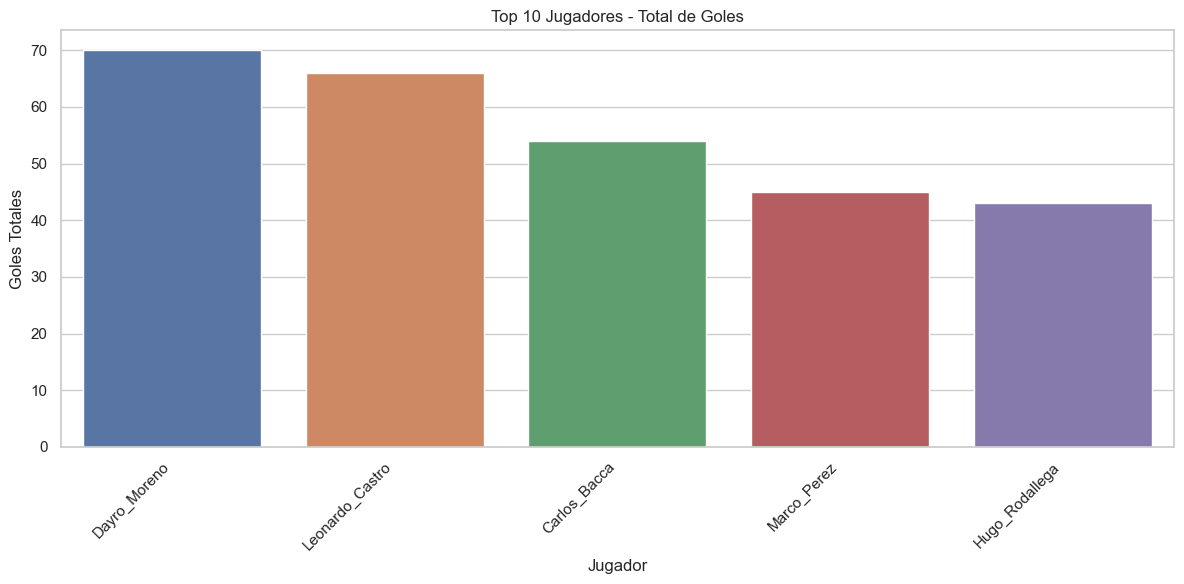

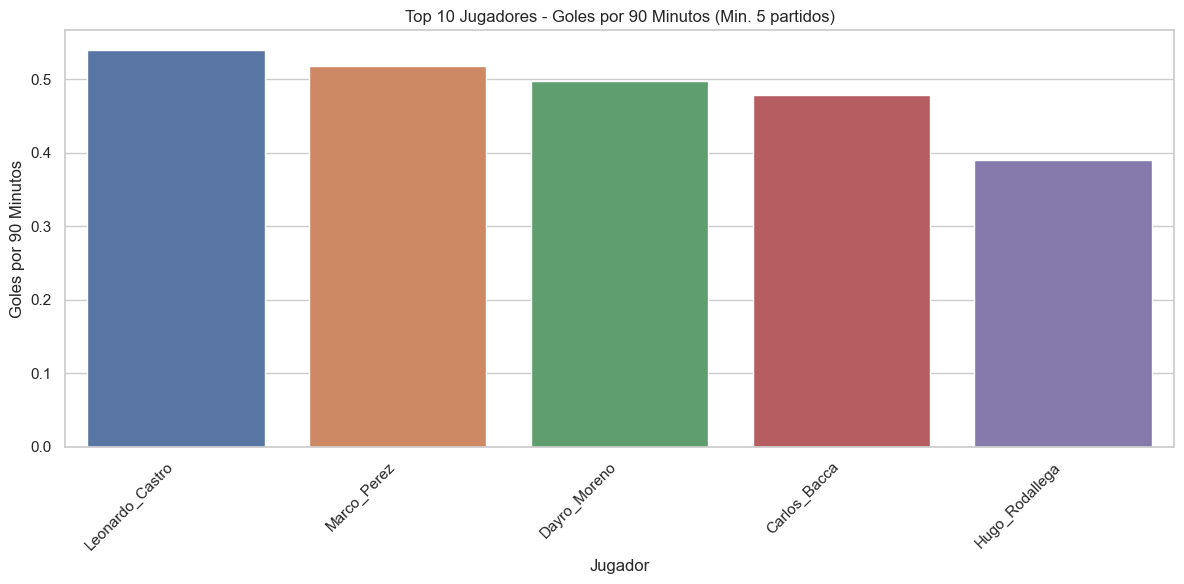

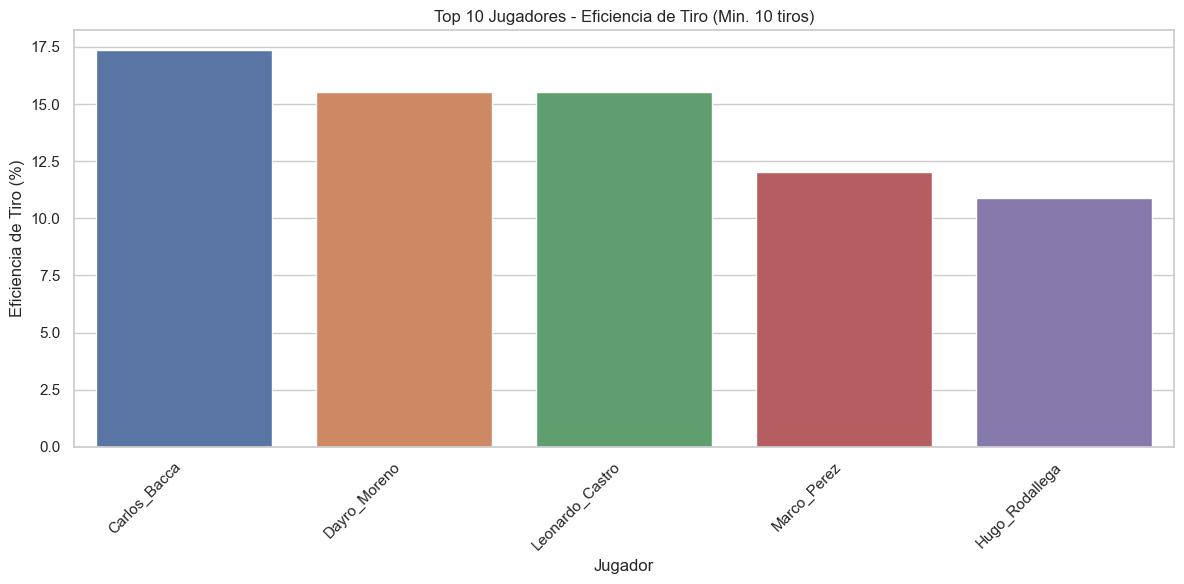

Evolución de goles por temporada para top 5 goleadores:
Temporada        2022  2023  2024  2025
Jugador                                
Carlos_Bacca        9    18    24     3
Dayro_Moreno       22    20    21     7
Hugo_Rodallega      1    15    18     9
Leonardo_Castro    24    15    21     6
Marco_Perez        14    28     3     0


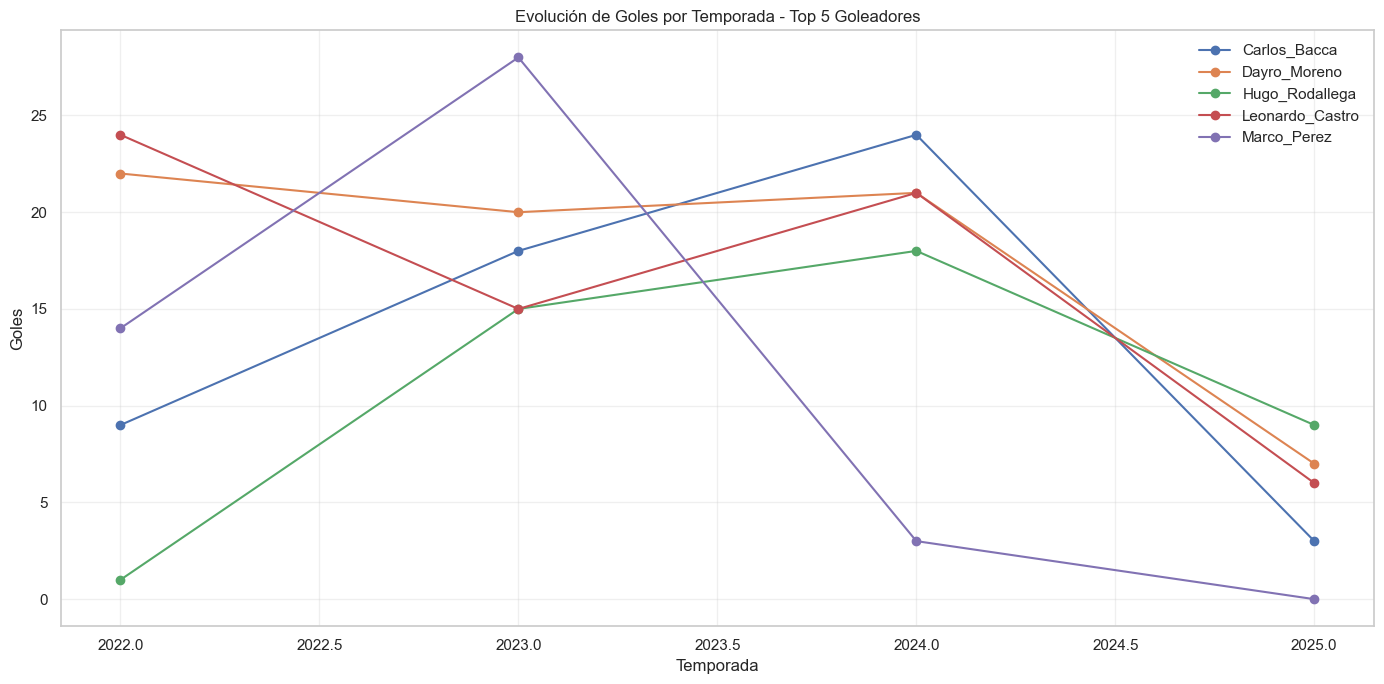


Evolución de eficiencia de tiro por temporada para top 5 goleadores:
Temporada        2022  2023  2024  2025
Jugador                                
Carlos_Bacca    19.67 14.75 18.68 16.67
Dayro_Moreno    15.24 19.83 11.82 16.89
Hugo_Rodallega   4.35 13.06  8.94 22.00
Leonardo_Castro 17.45  9.53 17.59 25.76
Marco_Perez     10.32 17.99  6.31  0.00


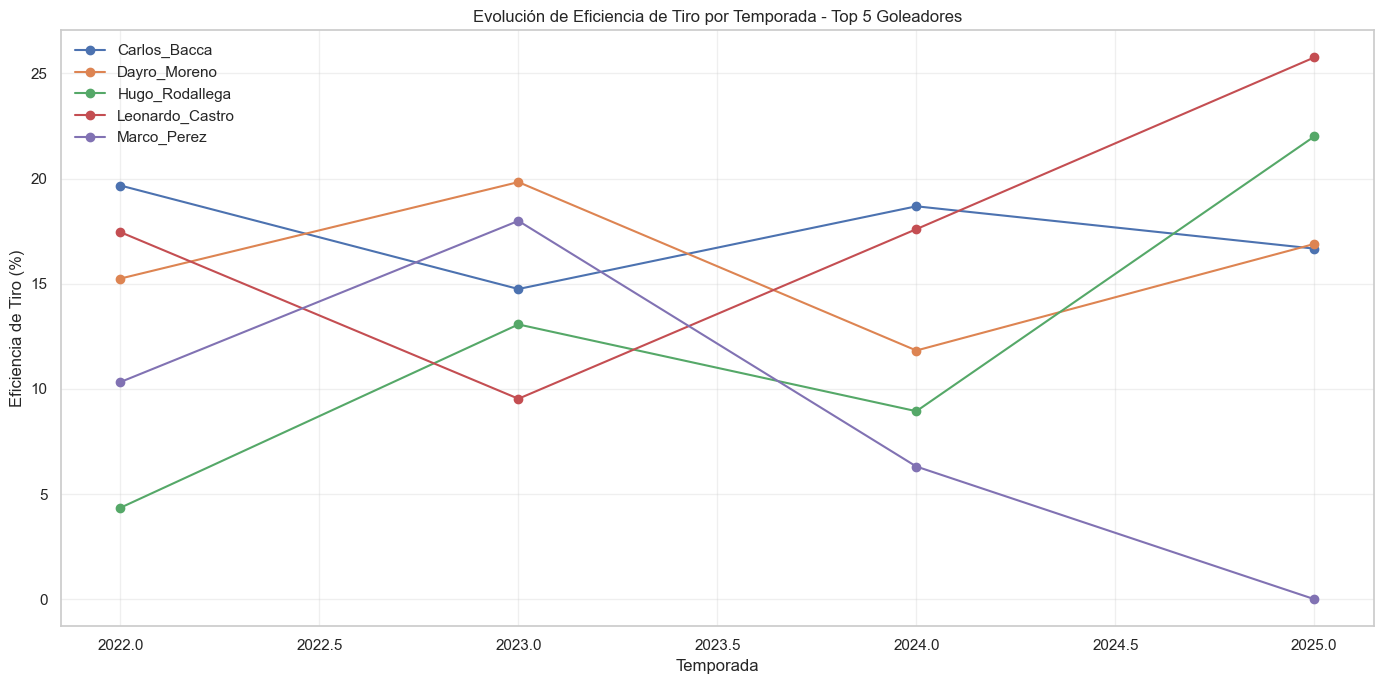

Goles como local vs visitante para top 5 goleadores:
                 Goles_Local  Goles_Visitante  Diferencia
Jugador                                                  
Dayro_Moreno            0.55             0.41        0.14
Leonardo_Castro         0.45             0.51       -0.06
Carlos_Bacca            0.51             0.27        0.23
Marco_Perez             0.40             0.34        0.06
Hugo_Rodallega          0.40             0.31        0.09


<Figure size 1400x700 with 0 Axes>

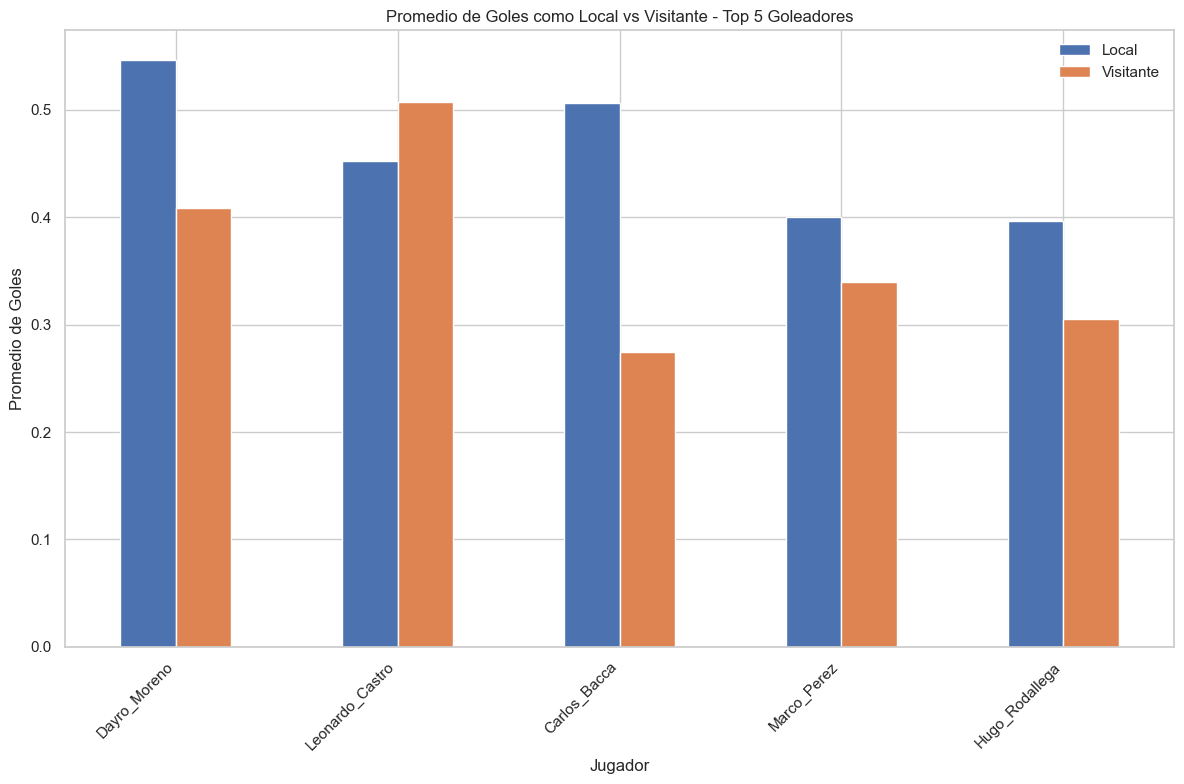


Relación entre minutos jugados y goles anotados:
Dayro_Moreno: Correlación Minutos-Goles = 0.1365
Leonardo_Castro: Correlación Minutos-Goles = 0.1166
Carlos_Bacca: Correlación Minutos-Goles = 0.3388
Marco_Perez: Correlación Minutos-Goles = 0.3062
Hugo_Rodallega: Correlación Minutos-Goles = 0.2296

Correlaciones promedio con goles para todos los jugadores (con al menos 5 partidos):
              Variable  Correlación_Promedio
0      Eficiencia_Tiro                  0.79
0       Tiros a puerta                  0.63
0       Precision_Tiro                  0.49
0        Tiros totales                  0.40
0  Score_Global_Ataque                  0.29
0      Indice_Ofensivo                  0.24
0              Minutos                  0.23
0          Asistencias                  0.01


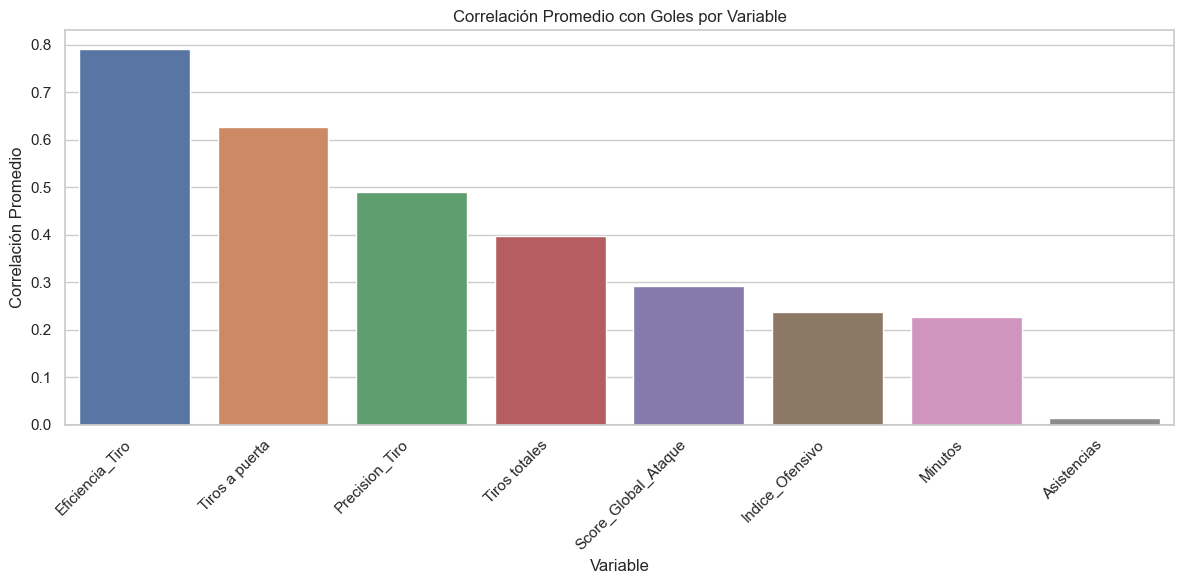

Matriz de correlación completa entre variables numéricas:


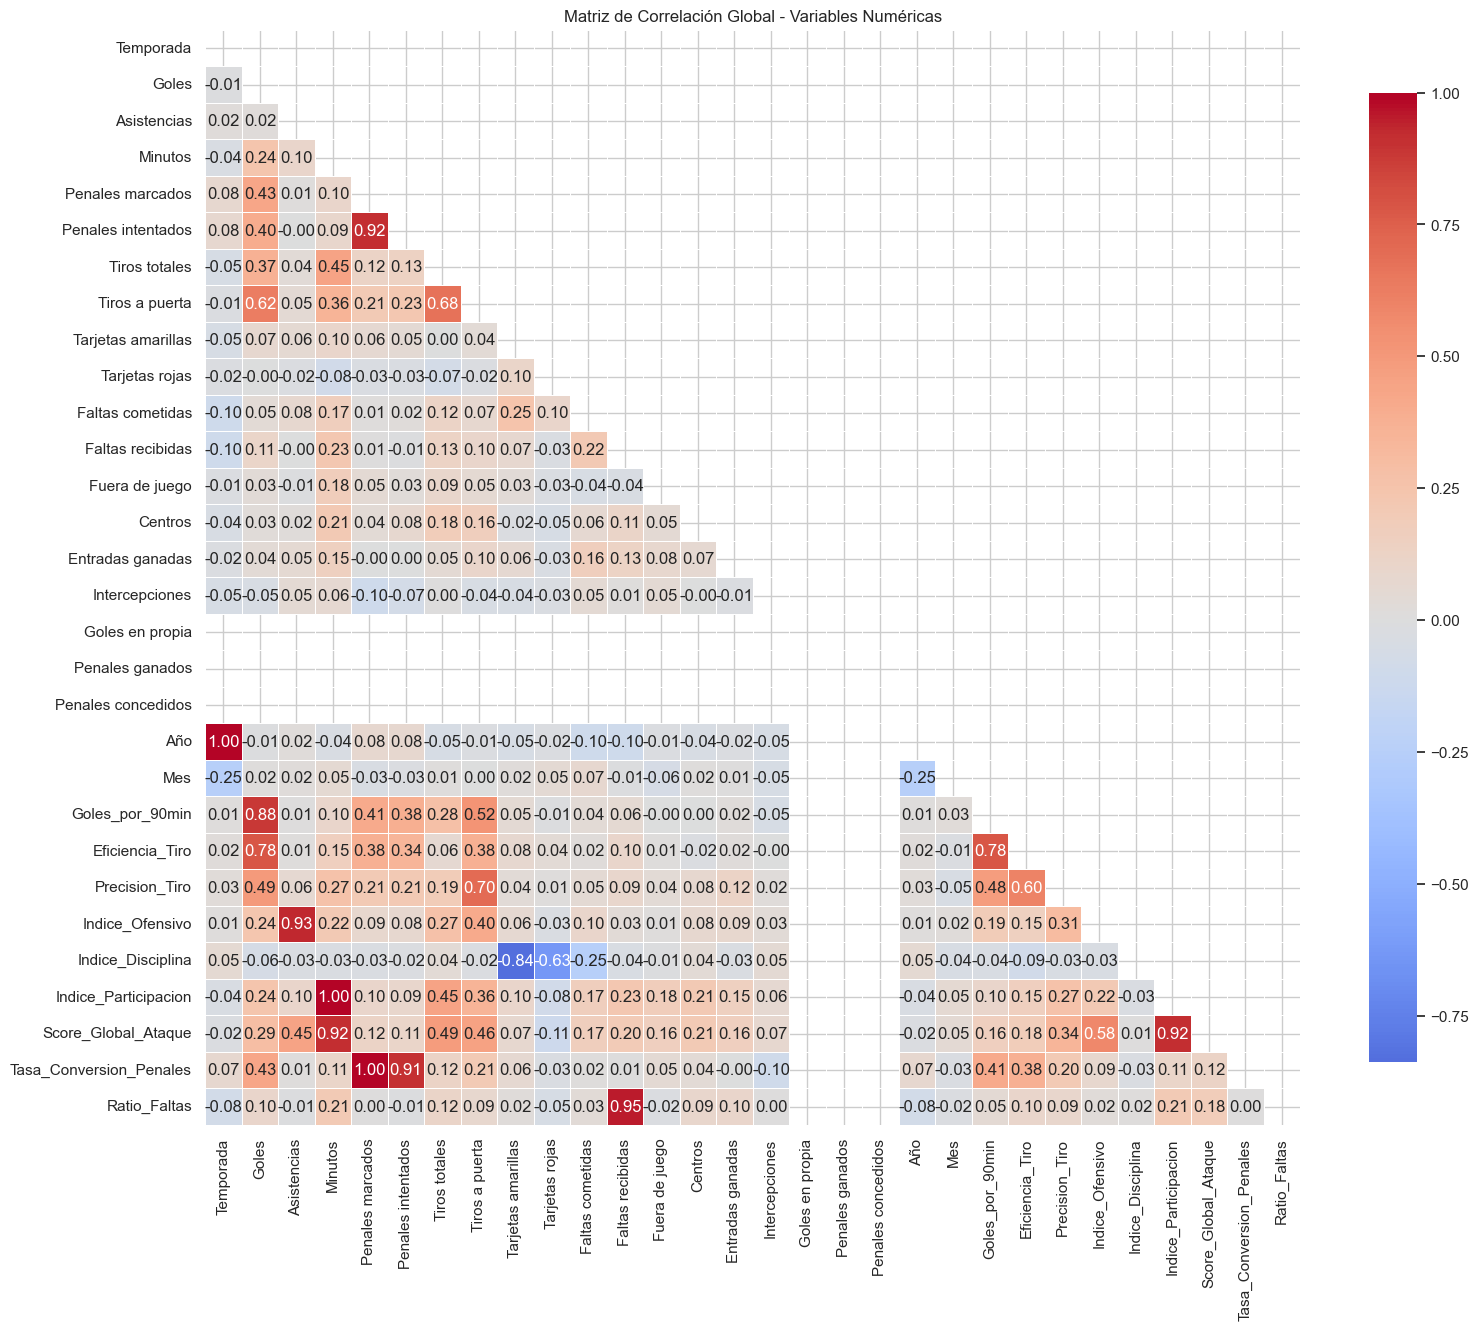


Variables más correlacionadas con 'Goles':
Goles                      1.00
Goles_por_90min            0.88
Eficiencia_Tiro            0.78
Tiros a puerta             0.62
Precision_Tiro             0.49
Tasa_Conversion_Penales    0.43
Penales marcados           0.43
Penales intentados         0.40
Tiros totales              0.37
Score_Global_Ataque        0.29
Minutos                    0.24
Indice_Participacion       0.24
Indice_Ofensivo            0.24
Faltas recibidas           0.11
Ratio_Faltas               0.10
Tarjetas amarillas         0.07
Faltas cometidas           0.05
Entradas ganadas           0.04
Fuera de juego             0.03
Centros                    0.03
Asistencias                0.02
Mes                        0.02
Tarjetas rojas            -0.00
Temporada                 -0.01
Año                       -0.01
Intercepciones            -0.05
Indice_Disciplina         -0.06
Goles en propia             NaN
Penales ganados             NaN
Penales concedidos          

In [8]:

# 1. Carga y exploración inicial de datos

# Carga de datos
ruta_archivo = "Goleadores_Procesados.csv"
df = pd.read_csv(ruta_archivo)

# Convertir fecha a datetime si es necesario
if 'Fecha' in df.columns:
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Información básica
print(f"Dimensiones del dataset: {df.shape[0]} filas, {df.shape[1]} columnas")
print(f"Número de jugadores únicos: {df['Jugador'].nunique()}")
print("\nDistribución de variables principales para análisis de goles:")
print(df[['Goles', 'Goles_por_90min', 'Eficiencia_Tiro', 'Precision_Tiro', 
          'Indice_Ofensivo', 'Score_Global_Ataque']].describe())

# 2. Análisis de mejores goleadores

# Top goleadores totales
print("Top 10 jugadores con más goles totales:")
top_goleadores = df.groupby('Jugador')['Goles'].sum().sort_values(ascending=False).head(10)
print(top_goleadores)

# Jugadores con mejor promedio de goles por 90 minutos (mínimo 5 partidos)
min_partidos = 5
if 'partido' in df.columns:
    jugadores_min_partidos = df.groupby('Jugador')['partido'].count() >= min_partidos
else:
    jugadores_min_partidos = df.groupby('Jugador').size() >= min_partidos

print(f"\nTop 10 jugadores con mejor promedio de goles por 90 minutos (mínimo {min_partidos} partidos):")
top_promedio = df.groupby('Jugador')['Goles_por_90min'].mean()
top_promedio = top_promedio[jugadores_min_partidos].sort_values(ascending=False).head(10)
print(top_promedio)

# Jugadores con mejor eficiencia de tiro (mínimo 10 tiros totales)
min_tiros = 10
jugadores_min_tiros = df.groupby('Jugador')['Tiros totales'].sum() >= min_tiros
print(f"\nTop 10 jugadores con mejor eficiencia de tiro (mínimo {min_tiros} tiros):")
top_eficiencia = df.groupby('Jugador')['Eficiencia_Tiro'].mean()
top_eficiencia = top_eficiencia[jugadores_min_tiros].sort_values(ascending=False).head(10)
print(top_eficiencia)

# Visualización: Top goleadores
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_goleadores.index, y=top_goleadores.values)
plt.title('Top 10 Jugadores - Total de Goles')
plt.xlabel('Jugador')
plt.ylabel('Goles Totales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualización: Top promedio goles por 90min
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_promedio.index, y=top_promedio.values)
plt.title(f'Top 10 Jugadores - Goles por 90 Minutos (Min. {min_partidos} partidos)')
plt.xlabel('Jugador')
plt.ylabel('Goles por 90 Minutos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualización: Top eficiencia de tiro
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_eficiencia.index, y=top_eficiencia.values)
plt.title(f'Top 10 Jugadores - Eficiencia de Tiro (Min. {min_tiros} tiros)')
plt.xlabel('Jugador')
plt.ylabel('Eficiencia de Tiro (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Evolución temporal de jugadores destacados

# Seleccionar top 5 goleadores para análisis temporal
top5_goleadores = top_goleadores.index[:5].tolist()

# Evolución por temporada (si hay varias temporadas)
if df['Temporada'].nunique() > 1:
    print("Evolución de goles por temporada para top 5 goleadores:")
    evolucion_temporada = df[df['Jugador'].isin(top5_goleadores)].groupby(['Jugador', 'Temporada'])['Goles'].sum().unstack()
    print(evolucion_temporada)
    
    # Visualización: Evolución temporal
    plt.figure(figsize=(14, 7))
    for jugador in evolucion_temporada.index:
        plt.plot(evolucion_temporada.columns, evolucion_temporada.loc[jugador], marker='o', label=jugador)
    plt.title('Evolución de Goles por Temporada - Top 5 Goleadores')
    plt.xlabel('Temporada')
    plt.ylabel('Goles')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Evolución de eficiencia por temporada
if df['Temporada'].nunique() > 1:
    print("\nEvolución de eficiencia de tiro por temporada para top 5 goleadores:")
    eficiencia_temporada = df[df['Jugador'].isin(top5_goleadores)].groupby(['Jugador', 'Temporada'])['Eficiencia_Tiro'].mean().unstack()
    print(eficiencia_temporada)
    
    # Visualización: Evolución de eficiencia
    plt.figure(figsize=(14, 7))
    for jugador in eficiencia_temporada.index:
        plt.plot(eficiencia_temporada.columns, eficiencia_temporada.loc[jugador], marker='o', label=jugador)
    plt.title('Evolución de Eficiencia de Tiro por Temporada - Top 5 Goleadores')
    plt.xlabel('Temporada')
    plt.ylabel('Eficiencia de Tiro (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 4. Factores que influyen en el rendimiento individual

# Comparación de goles como local vs visitante para los mejores goleadores
print("Goles como local vs visitante para top 5 goleadores:")
if 'Sede_Local' in df.columns and 'Sede_Visitante' in df.columns:
    goles_sede = pd.DataFrame()
    for jugador in top5_goleadores:
        jugador_df = df[df['Jugador'] == jugador]
        goles_local = jugador_df[jugador_df['Sede_Local'] == 1]['Goles'].mean()
        goles_visit = jugador_df[jugador_df['Sede_Visitante'] == 1]['Goles'].mean()
        goles_sede = pd.concat([goles_sede, pd.DataFrame({
            'Jugador': [jugador],
            'Goles_Local': [goles_local],
            'Goles_Visitante': [goles_visit],
            'Diferencia': [goles_local - goles_visit]
        })])
    print(goles_sede.set_index('Jugador'))
    
    # Visualización: Comparativa local vs visitante
    plt.figure(figsize=(14, 7))
    goles_sede.set_index('Jugador')[['Goles_Local', 'Goles_Visitante']].plot(kind='bar')
    plt.title('Promedio de Goles como Local vs Visitante - Top 5 Goleadores')
    plt.xlabel('Jugador')
    plt.ylabel('Promedio de Goles')
    plt.legend(['Local', 'Visitante'])
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Distribución de minutos jugados vs. goles anotados
print("\nRelación entre minutos jugados y goles anotados:")
for jugador in top5_goleadores:
    jugador_df = df[df['Jugador'] == jugador]
    corr = jugador_df[['Minutos', 'Goles']].corr().iloc[0, 1]
    print(f"{jugador}: Correlación Minutos-Goles = {corr:.4f}")

# Visualización de relación Minutos vs Goles omitida

# 5. Correlaciones para predicción individual

# Variables relevantes para correlación
vars_correlacion = ['Goles', 'Minutos', 'Tiros totales', 'Tiros a puerta', 
                   'Asistencias', 'Eficiencia_Tiro', 'Precision_Tiro',
                   'Indice_Ofensivo', 'Score_Global_Ataque']
vars_correlacion = [v for v in vars_correlacion if v in df.columns]

# Análisis de correlación - omitido el análisis específico por jugador
# para centrarnos en las correlaciones generales del dataset

# Calcular correlaciones promedio para todos los jugadores relevantes
print("\nCorrelaciones promedio con goles para todos los jugadores (con al menos 5 partidos):")
correlaciones_promedio = pd.DataFrame(columns=['Variable', 'Correlación_Promedio'])

jugadores_relevantes = df['Jugador'].value_counts()[df['Jugador'].value_counts() >= 5].index.tolist()

for var in vars_correlacion:
    if var == 'Goles':
        continue
    
    correlaciones = []
    for jugador in jugadores_relevantes:
        jugador_df = df[df['Jugador'] == jugador]
        if jugador_df.shape[0] < 5:  # Mínimo 5 observaciones para correlación significativa
            continue
        if jugador_df[var].std() == 0 or jugador_df['Goles'].std() == 0:  # Evitar divisiones por cero
            continue
        corr = jugador_df[[var, 'Goles']].corr().iloc[0, 1]
        if not np.isnan(corr):
            correlaciones.append(corr)
    
    if correlaciones:
        correlaciones_promedio = pd.concat([correlaciones_promedio, pd.DataFrame({
            'Variable': [var],
            'Correlación_Promedio': [np.mean(correlaciones)]
        })])

print(correlaciones_promedio.sort_values('Correlación_Promedio', ascending=False))

# Visualización: Correlaciones promedio
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Variable', y='Correlación_Promedio', 
                data=correlaciones_promedio.sort_values('Correlación_Promedio', ascending=False))
plt.title('Correlación Promedio con Goles por Variable')
plt.xlabel('Variable')
plt.ylabel('Correlación Promedio')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Matriz de correlación general

# Seleccionar todas las variables numéricas relevantes
vars_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Eliminar variables dummy y otras no relevantes para correlación
vars_numericas = [var for var in vars_numericas if not var.startswith('Equipo_') and 
                 not var.startswith('Oponente_') and not var.startswith('Sede_')]

# Calcular matriz de correlación de todas las variables numéricas
print("Matriz de correlación completa entre variables numéricas:")
corr_matriz = df[vars_numericas].corr()

# Visualización: Matriz de correlación global
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matriz, dtype=bool))
sns.heatmap(corr_matriz, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación Global - Variables Numéricas')
plt.savefig('matriz_correlacion_global.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# Obtener las correlaciones más altas con la variable 'Goles'
print("\nVariables más correlacionadas con 'Goles':")
corr_con_goles = corr_matriz['Goles'].sort_values(ascending=False)
print(corr_con_goles)

# 7. Resumen final

# Resumir hallazgos clave
print("Variables más correlacionadas con los goles (promedio entre jugadores):")
print(correlaciones_promedio.sort_values('Correlación_Promedio', ascending=False).head(5))

print("\nJugadores con mejor rendimiento:")
print("- Mayor cantidad de goles:", top_goleadores.index[0])
print("- Mejor promedio por 90 min:", top_promedio.index[0])
print("- Mejor eficiencia de tiro:", top_eficiencia.index[0])

print("\nFactores relevantes para predecir goles de un jugador:")
print("1. Tiros a puerta")
print("2. Eficiencia de tiro")
print("3. Minutos jugados")
print("4. Score Global de Ataque")
print("5. Índice Ofensivo")

print("\nConsideraciones para un modelo predictivo:")
print("- La relación entre minutos y goles varía significativamente entre jugadores")
print("- La sede (local/visitante) parece influir en el rendimiento de algunos jugadores")
print("- La eficiencia de tiro es un buen predictor de los goles por 90 minutos")
print("- Los índices compuestos (Score_Global_Ataque) capturan bien el rendimiento goleador")

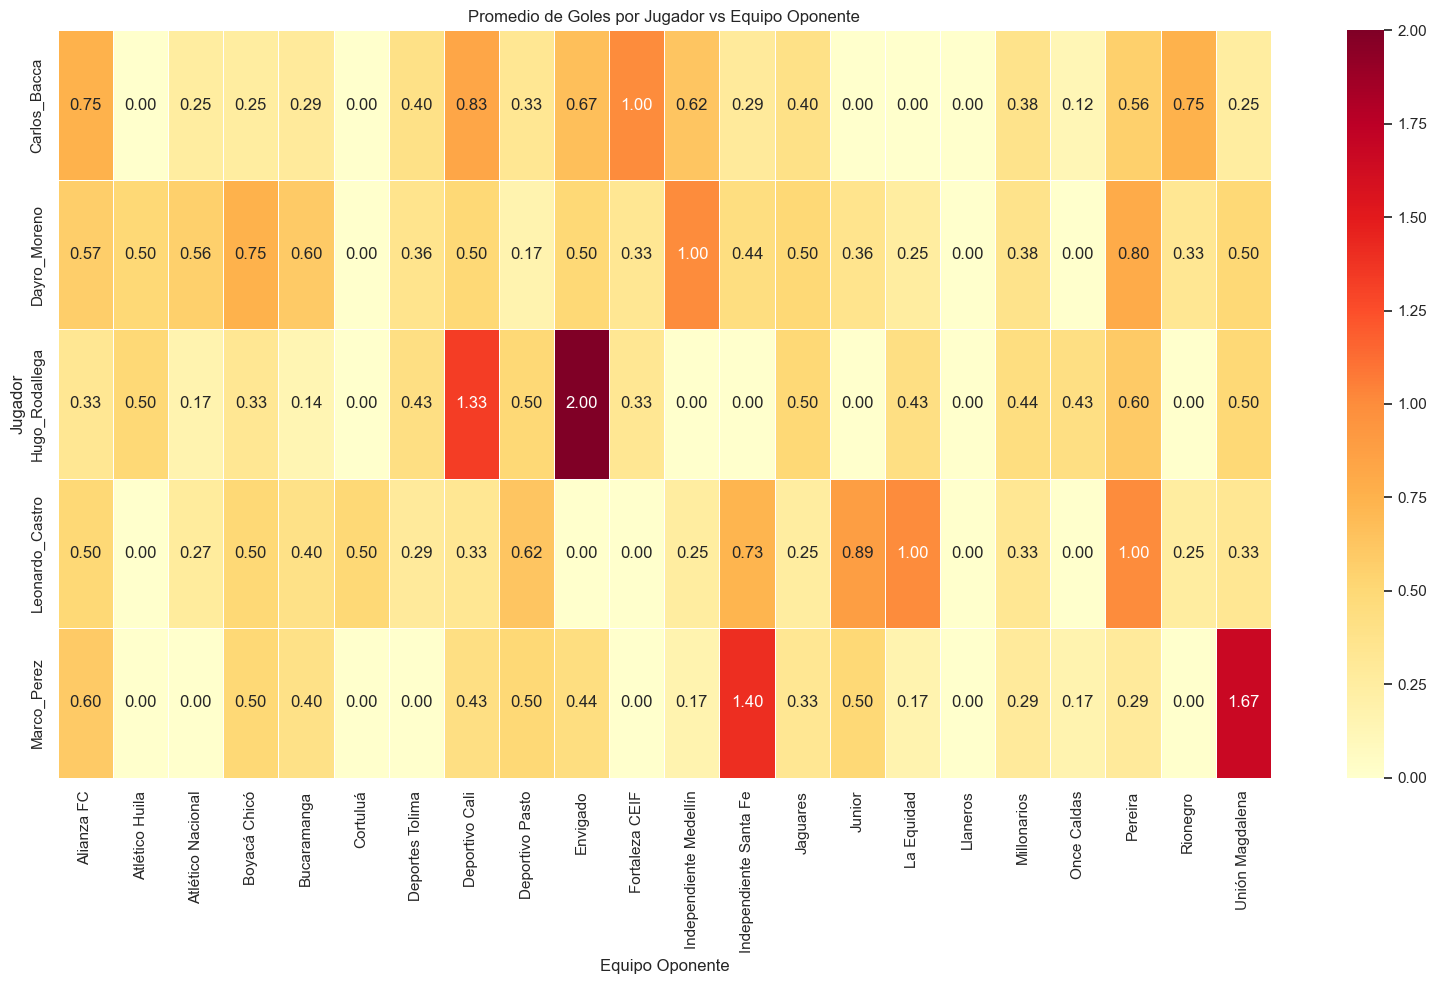

<Figure size 1200x800 with 0 Axes>

In [9]:
# Agrupar por jugador y oponente para ver el promedio de goles
goles_vs_oponentes = df.groupby(['Jugador', 'Oponente_Estandarizado'])['Goles'].mean().reset_index()

# Transformar a formato matricial para visualización
matriz_goles = goles_vs_oponentes.pivot_table(
    index='Jugador', 
    columns='Oponente_Estandarizado', 
    values='Goles',
    fill_value=0
)

# Filtrar para mostrar solo los principales goleadores y equipos colombianos
# (ajusta el número según necesites)
top_jugadores = df.groupby('Jugador')['Goles'].sum().sort_values(ascending=False).head(15).index
equipos_colombianos = [col for col in df.columns if col.startswith('Oponente_') and 
                      col not in ['Oponente_Estandarizado', 'Oponente_Es_Colombiano']]
equipos_colombianos = [col.replace('Oponente_', '') for col in equipos_colombianos]

# Filtrar la matriz
matriz_filtrada = matriz_goles.loc[matriz_goles.index.isin(top_jugadores), 
                                  [col for col in matriz_goles.columns if col in equipos_colombianos]]

# Visualizar con heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(matriz_filtrada, cmap='YlOrRd', annot=True, fmt='.2f', linewidths=.5)
plt.title('Promedio de Goles por Jugador vs Equipo Oponente')
plt.xlabel('Equipo Oponente')
plt.ylabel('Jugador')
plt.tight_layout()
plt.show()

# Guardar gráfico si es necesario
plt.savefig('correlacion_jugadores_oponentes.png', dpi=300, bbox_inches='tight')

**Preparacion de datos modelo ARIMA**

Cargando datos...
Preparando variables temporales...
Creando variable de rendimiento histórico contra oponentes...
Calculando tendencia reciente de los jugadores...
Seleccionando jugadores para análisis...
Top 5 jugadores con más registros:
Jugador
Dayro_Moreno       146
Leonardo_Castro    138
Carlos_Bacca       135
Hugo_Rodallega     122
Marco_Perez        121
Name: count, dtype: int64
Jugadores seleccionados para análisis: ['Dayro_Moreno', 'Leonardo_Castro', 'Carlos_Bacca', 'Hugo_Rodallega', 'Marco_Perez']
Normalizando variables numéricas...

Procesando datos para cada jugador seleccionado...

--- Procesando Dayro_Moreno ---
Registros disponibles: 146
Preparación completada. Serie temporal de 146 registros por partido.

--- Procesando Leonardo_Castro ---
Registros disponibles: 138
Preparación completada. Serie temporal de 138 registros por partido.

--- Procesando Carlos_Bacca ---
Registros disponibles: 135
Preparación completada. Serie temporal de 135 registros por partido.

--- Pro

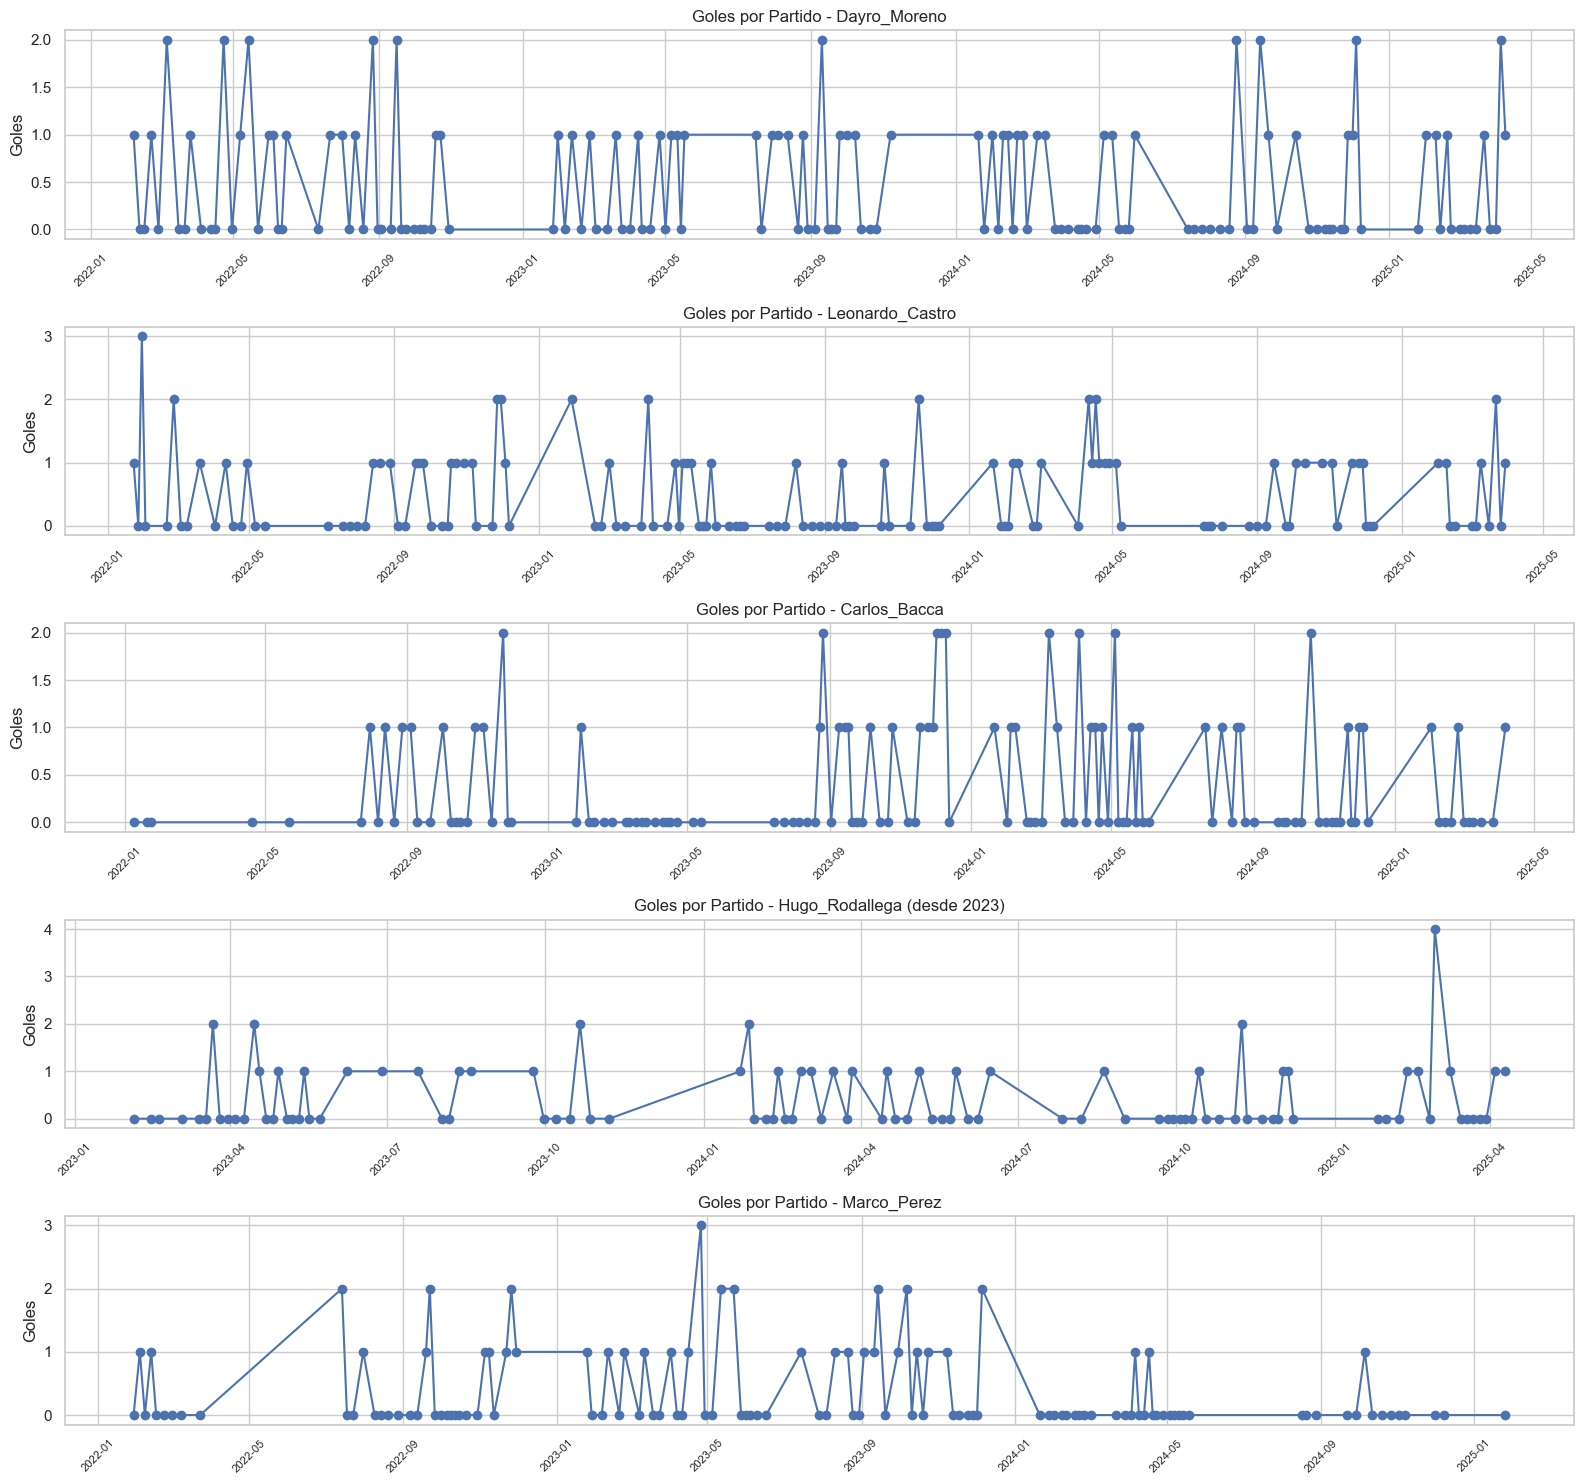

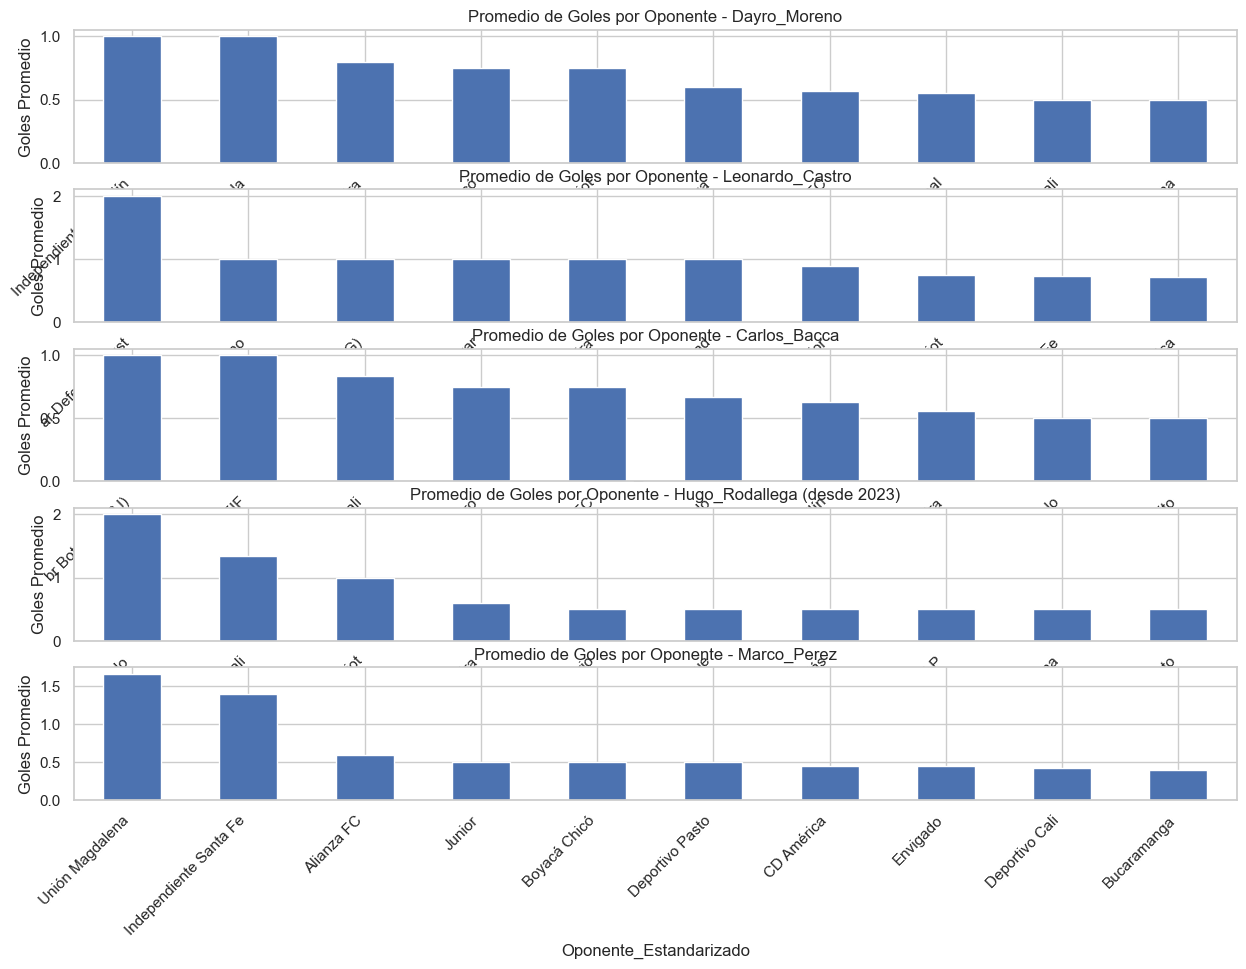


¡Datos preparados con éxito para todos los jugadores a nivel de partido individual!


In [3]:
# 1. Carga de datos
print("Cargando datos...")
df = pd.read_csv("Goleadores_Procesados.csv")

# 2. Preparación de variables temporales
print("Preparando variables temporales...")
# Asegurarse de que la fecha esté en formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
# Ordenar por fecha y jugador
df = df.sort_values(by=['Jugador', 'Fecha'])

# 3. Creación de variable de rendimiento histórico contra oponentes
print("Creando variable de rendimiento histórico contra oponentes...")
# Para cada partido, calcular el promedio histórico de goles ANTES de ese partido
df_con_historico = df.copy()
df_con_historico['Promedio_Historico_vs_Oponente'] = 0.0

# Iterar por jugador y crear historial dinámico (solo datos anteriores)
jugadores_unicos = df['Jugador'].unique()
for jugador in jugadores_unicos:
    df_jugador = df[df['Jugador'] == jugador].copy()
    # Ordenar cronológicamente
    df_jugador = df_jugador.sort_values(by='Fecha')
    
    # Para cada partido
    for idx, partido in df_jugador.iterrows():
        oponente = partido['Oponente_Estandarizado']
        fecha_partido = partido['Fecha']
        
        # Filtrar partidos previos contra el mismo oponente
        partidos_previos = df_jugador[(df_jugador['Fecha'] < fecha_partido) & 
                                     (df_jugador['Oponente_Estandarizado'] == oponente)]
        
        # Calcular promedio de goles en partidos previos o usar 0 si no hay historial
        if len(partidos_previos) > 0:
            promedio_historico = partidos_previos['Goles'].mean()
        else:
            promedio_historico = 0.0
        
        # Guardar el valor en el DataFrame original
        df_con_historico.loc[idx, 'Promedio_Historico_vs_Oponente'] = promedio_historico

# Usar el DataFrame actualizado con historial dinámico
df = df_con_historico

# 4. Calcular tendencia reciente para cada jugador
print("Calculando tendencia reciente de los jugadores...")
df['Tendencia_Reciente'] = 0.0

for jugador in jugadores_unicos:
    df_jugador = df[df['Jugador'] == jugador].copy()
    # Ordenar cronológicamente
    df_jugador = df_jugador.sort_values(by='Fecha')
    
    # Para cada partido, calcular tendencia basada en los 5 partidos anteriores
    for idx, partido in df_jugador.iterrows():
        fecha_partido = partido['Fecha']
        
        # Obtener los últimos 5 partidos antes de este
        ultimos_partidos = df_jugador[(df_jugador['Fecha'] < fecha_partido)].tail(5)
        
        if len(ultimos_partidos) > 0:
            # Calcular promedio de goles reciente
            promedio_reciente = ultimos_partidos['Goles'].mean()
            # Calcular promedio general hasta ese momento
            promedio_general = df_jugador[(df_jugador['Fecha'] < fecha_partido)]['Goles'].mean()
            
            if promedio_general > 0:
                # Tendencia: proporción entre rendimiento reciente y general
                tendencia = promedio_reciente / promedio_general
            else:
                tendencia = 1.0  # Neutral si no hay datos suficientes
            
            # Guardar la tendencia en el DataFrame
            df.loc[idx, 'Tendencia_Reciente'] = tendencia

# 5. Selección de jugadores para análisis
print("Seleccionando jugadores para análisis...")
# Mostrar distribución de jugadores
jugadores_count = df['Jugador'].value_counts()
print(f"Top 5 jugadores con más registros:\n{jugadores_count.head()}")

# Seleccionar top jugadores para análisis
num_jugadores = 5
top_jugadores = jugadores_count.head(num_jugadores).index.tolist()
print(f"Jugadores seleccionados para análisis: {top_jugadores}")

# 6. Variables seleccionadas según análisis previo
variables_modelo = [
    'Fecha', 'Goles', 'Tiros a puerta', 'Penales marcados', 
    'Tiros totales', 'Minutos', 'Oponente_Estandarizado', 
    'Sede_Local', 'Sede_Visitante', 'Promedio_Historico_vs_Oponente',
    'Tendencia_Reciente'  # Nueva variable
]

# Diccionarios para almacenar dataframes por jugador
df_jugadores = {}
y_series = {}
X_dfs = {}

# 7. Normalizar variables numéricas (mejora para el modelo ARIMAX)
print("Normalizando variables numéricas...")
variables_a_normalizar = ['Tiros a puerta', 'Tiros totales', 'Minutos']
stats_normalizacion = {}

for jugador in top_jugadores:
    df_jugador = df[df['Jugador'] == jugador].copy()
    stats_jugador = {}
    
    for var in variables_a_normalizar:
        if var in df_jugador.columns:
            # Guardar media y desviación estándar para normalizar nuevos datos
            media = df_jugador[var].mean()
            std = df_jugador[var].std()
            if std > 0:  # Evitar división por cero
                stats_jugador[var] = {'mean': media, 'std': std}
                # Crear nueva columna normalizada
                df_jugador[f'{var}_norm'] = (df_jugador[var] - media) / std
    
    stats_normalizacion[jugador] = stats_jugador
    df[df['Jugador'] == jugador] = df_jugador

# 8. Procesamiento para cada jugador seleccionado
print("\nProcesando datos para cada jugador seleccionado...")
for jugador in top_jugadores:
    print(f"\n--- Procesando {jugador} ---")
    
    # Filtrar datos para el jugador
    df_jugador = df[df['Jugador'] == jugador].copy().sort_values(by='Fecha')
    
    # MODIFICACIÓN: Filtrar datos de Hugo Rodallega para que comiencen desde 2023
    if jugador == 'Hugo_Rodallega':
        # Filtrar registros desde el 1 de enero de 2023
        fecha_inicio = pd.Timestamp('2023-01-01')
        df_jugador = df_jugador[df_jugador['Fecha'] >= fecha_inicio]
        print(f"Filtrando datos de {jugador} desde {fecha_inicio.strftime('%d/%m/%Y')}")
    
    print(f"Registros disponibles: {len(df_jugador)}")
    
    # Verificar variables disponibles
    variables_originales = [var for var in variables_modelo if var in df_jugador.columns]
    variables_normalizadas = [f"{var}_norm" for var in variables_a_normalizar 
                             if f"{var}_norm" in df_jugador.columns]
    
    variables_finales = list(set(variables_originales + variables_normalizadas))
    variables_faltantes = [var for var in variables_modelo if var not in variables_finales]
    
    if variables_faltantes:
        print(f"Advertencia: Variables no disponibles: {variables_faltantes}")
    
    # Crear dataframe con variables seleccionadas
    df_modelo = df_jugador[variables_finales].copy()
    
    # Preparación final - usar datos a nivel de partido, no mensual
    df_modelo_final = df_modelo.set_index('Fecha')
    
    # Guardar en diccionarios
    df_jugadores[jugador] = df_jugador
    y_series[jugador] = df_modelo_final['Goles']
    X_dfs[jugador] = df_modelo_final.drop('Goles', axis=1)
    
    print(f"Preparación completada. Serie temporal de {len(df_modelo_final)} registros por partido.")

# 9. Guardar información de normalización para uso en predicciones
import pickle
with open('stats_normalizacion.pkl', 'wb') as f:
    pickle.dump(stats_normalizacion, f)
print("Estadísticas de normalización guardadas para uso en predicciones.")

# 10. Visualización de series temporales para todos los jugadores seleccionados
print("\nVisualizando series temporales de goles para todos los jugadores...")

# Gráficos individuales - goles por partido
plt.figure(figsize=(16, num_jugadores*3))

for i, jugador in enumerate(top_jugadores, 1):
    plt.subplot(num_jugadores, 1, i)
    df_plot = df_jugadores[jugador].sort_values(by='Fecha')
    plt.plot(df_plot['Fecha'], df_plot['Goles'], marker='o', linestyle='-')
    
    # Añadir indicación en título para Hugo Rodallega
    if jugador == 'Hugo_Rodallega':
        plt.title(f'Goles por Partido - {jugador} (desde 2023)')
    else:
        plt.title(f'Goles por Partido - {jugador}')
    
    plt.ylabel('Goles')
    plt.grid(True)
    plt.tick_params(axis='x', labelsize=8, rotation=45)

plt.tight_layout()
plt.show()

# Gráfico adicional: goles contra diferentes oponentes
plt.figure(figsize=(15, 10))
for i, jugador in enumerate(top_jugadores, 1):
    plt.subplot(num_jugadores, 1, i)
    df_oponentes = df_jugadores[jugador].groupby('Oponente_Estandarizado')['Goles'].mean().sort_values(ascending=False).head(10)
    df_oponentes.plot(kind='bar')
    
    # Añadir indicación en título para Hugo Rodallega
    if jugador == 'Hugo_Rodallega':
        plt.title(f'Promedio de Goles por Oponente - {jugador} (desde 2023)')
    else:
        plt.title(f'Promedio de Goles por Oponente - {jugador}')
    
    plt.ylabel('Goles Promedio')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

print("\n¡Datos preparados con éxito para todos los jugadores a nivel de partido individual!")

**Entrenamiento ARIMA/ARIMAX**

Iniciando entrenamiento de modelos ARIMA/ARIMAX para cada jugador...
Estadísticas de normalización cargadas correctamente.

=== Entrenamiento para Dayro_Moreno ===
Conjunto de entrenamiento: 116 partidos
Conjunto de prueba: 30 partidos
Entrenando modelo ARIMAX con 7 variables exógenas
Ejecutando validación cruzada temporal para selección de parámetros...
Mejores parámetros según validación cruzada: ARIMA(1, 0, 1) (MSE: 0.2822)
Entrenando modelo final...
Evaluando modelo...
MSE: 0.2748
RMSE: 0.5242
MAE: 0.4011
Porcentaje de acierto: 90.00%
Generando predicciones para próximos partidos...
Predicción para próximos 3 partidos: [0.75337717 0.74485695 0.7427896 ]
Modelo guardado correctamente en: modelos_arima/arima_Dayro_Moreno.pkl
  - Tipo: ARIMAX(1, 0, 1)
  - Métricas: RMSE=0.52, MAE=0.40, Acierto=90.0%


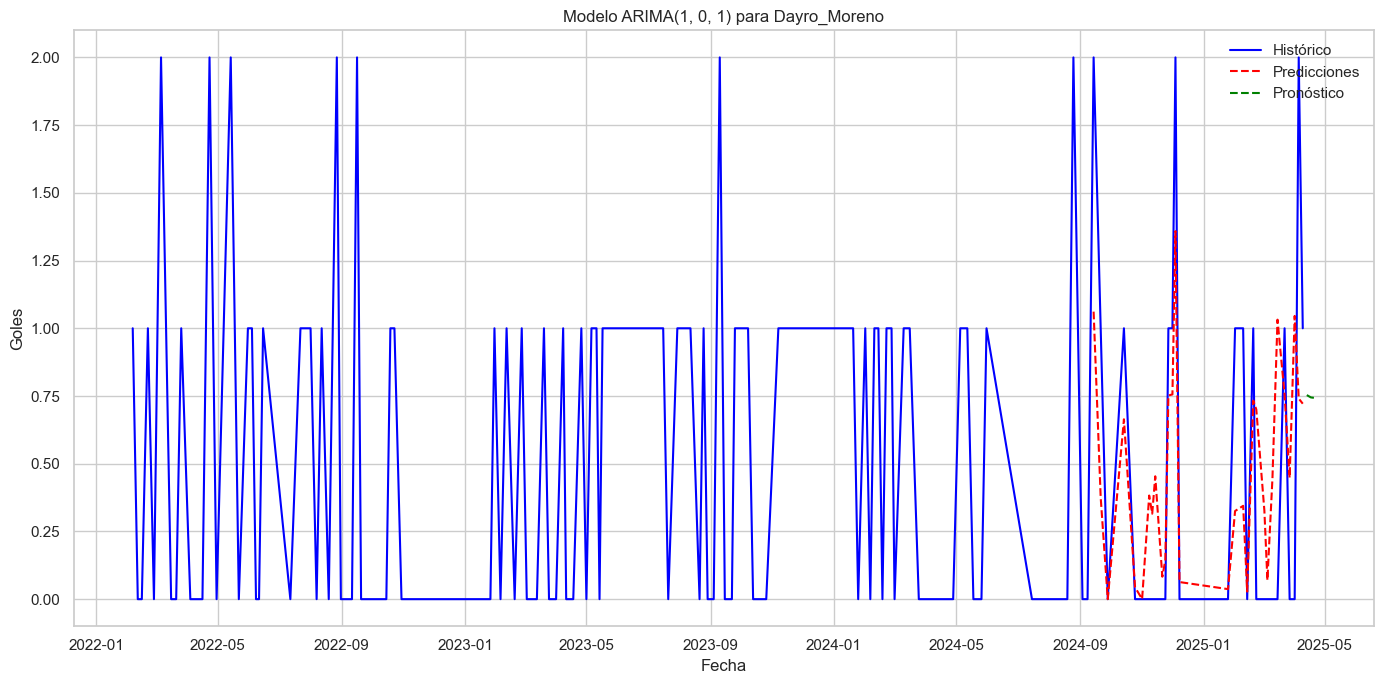


=== Entrenamiento para Leonardo_Castro ===
Conjunto de entrenamiento: 110 partidos
Conjunto de prueba: 28 partidos
Entrenando modelo ARIMAX con 7 variables exógenas
Ejecutando validación cruzada temporal para selección de parámetros...
Mejores parámetros según validación cruzada: ARIMA(2, 0, 0) (MSE: 0.2550)
Entrenando modelo final...
Evaluando modelo...
MSE: 0.2297
RMSE: 0.4793
MAE: 0.3303
Porcentaje de acierto: 92.86%
Generando predicciones para próximos partidos...
Predicción para próximos 3 partidos: [0.403474   0.39183359 0.39064067]
Modelo guardado correctamente en: modelos_arima/arima_Leonardo_Castro.pkl
  - Tipo: ARIMAX(2, 0, 0)
  - Métricas: RMSE=0.48, MAE=0.33, Acierto=92.9%


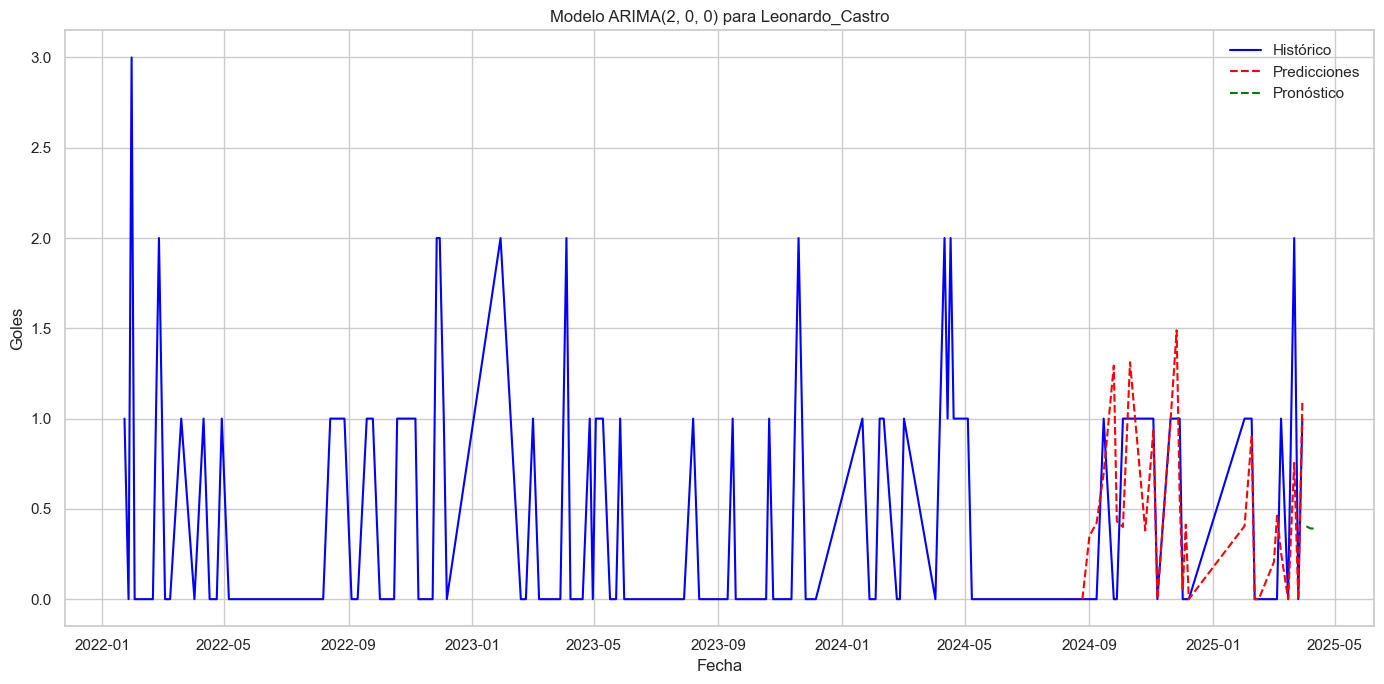


=== Entrenamiento para Carlos_Bacca ===
Conjunto de entrenamiento: 108 partidos
Conjunto de prueba: 27 partidos
Entrenando modelo ARIMAX con 7 variables exógenas
Ejecutando validación cruzada temporal para selección de parámetros...
Mejores parámetros según validación cruzada: ARIMA(0, 1, 2) (MSE: 0.2751)
Entrenando modelo final...
Evaluando modelo...
MSE: 0.2357
RMSE: 0.4855
MAE: 0.2673
Porcentaje de acierto: 96.30%
Generando predicciones para próximos partidos...
Predicción para próximos 3 partidos: [0.34960798 0.35067728 0.35067728]
Modelo guardado correctamente en: modelos_arima/arima_Carlos_Bacca.pkl
  - Tipo: ARIMAX(0, 1, 2)
  - Métricas: RMSE=0.49, MAE=0.27, Acierto=96.3%


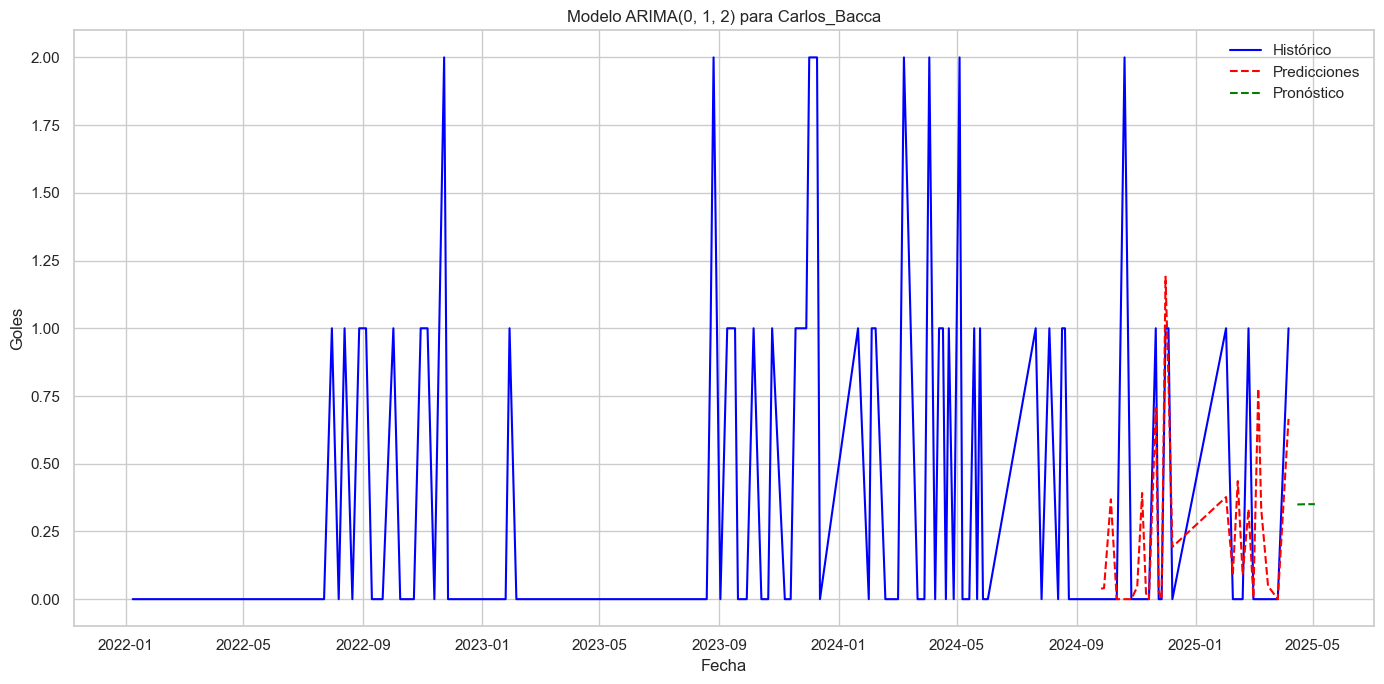


=== Entrenamiento para Hugo_Rodallega ===
Conjunto de entrenamiento: 79 partidos
Conjunto de prueba: 20 partidos
Entrenando modelo ARIMAX con 7 variables exógenas
Ejecutando validación cruzada temporal para selección de parámetros...
Mejores parámetros según validación cruzada: ARIMA(3, 0, 1) (MSE: 0.3492)
Entrenando modelo final...
Evaluando modelo...
MSE: 0.8144
RMSE: 0.9024
MAE: 0.5858
Porcentaje de acierto: 95.00%
Generando predicciones para próximos partidos...
Predicción para próximos 3 partidos: [0.32459762 0.49062722 0.4387143 ]
Modelo guardado correctamente en: modelos_arima/arima_Hugo_Rodallega.pkl
  - Tipo: ARIMAX(3, 0, 1)
  - Métricas: RMSE=0.90, MAE=0.59, Acierto=95.0%


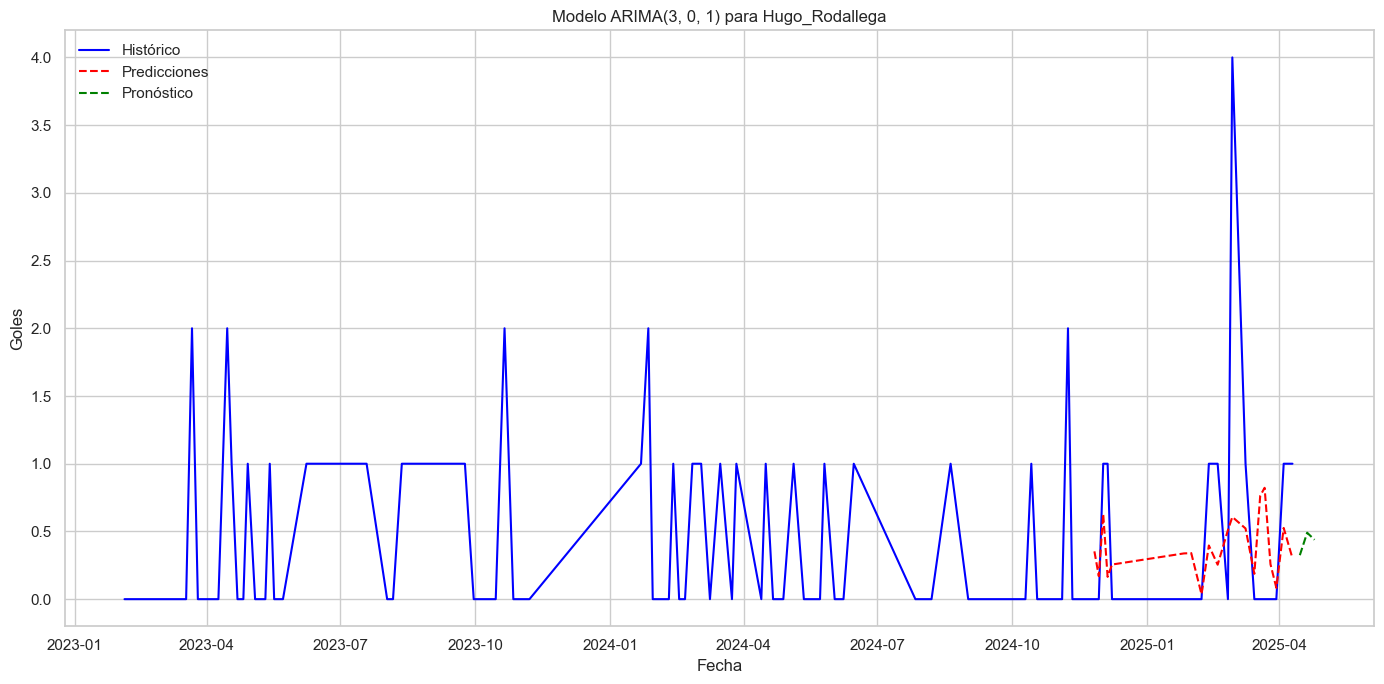


=== Entrenamiento para Marco_Perez ===
Conjunto de entrenamiento: 96 partidos
Conjunto de prueba: 25 partidos
Entrenando modelo ARIMAX con 7 variables exógenas
Ejecutando validación cruzada temporal para selección de parámetros...
Mejores parámetros según validación cruzada: ARIMA(1, 0, 3) (MSE: 0.4943)
Entrenando modelo final...
Evaluando modelo...
MSE: 0.0630
RMSE: 0.2510
MAE: 0.1106
Porcentaje de acierto: 100.00%
Generando predicciones para próximos partidos...
Predicción para próximos 3 partidos: [0.01852691 0.         0.        ]
Modelo guardado correctamente en: modelos_arima/arima_Marco_Perez.pkl
  - Tipo: ARIMAX(1, 0, 3)
  - Métricas: RMSE=0.25, MAE=0.11, Acierto=100.0%


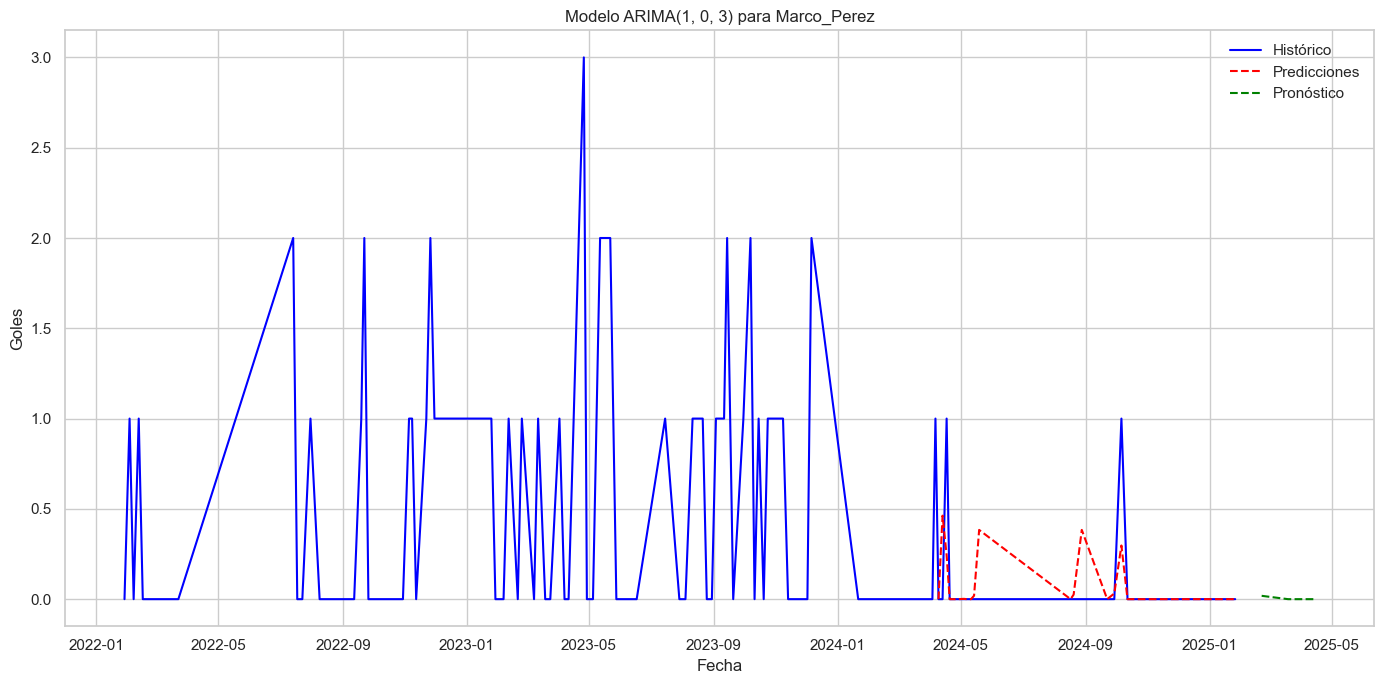


=== Comparación de rendimiento entre jugadores ===
                         Modelo  RMSE  MAE  Acierto (%)
Marco_Perez      ARIMA(1, 0, 3)  0.25 0.11       100.00
Carlos_Bacca     ARIMA(0, 1, 2)  0.49 0.27        96.30
Hugo_Rodallega   ARIMA(3, 0, 1)  0.90 0.59        95.00
Leonardo_Castro  ARIMA(2, 0, 0)  0.48 0.33        92.86
Dayro_Moreno     ARIMA(1, 0, 1)  0.52 0.40        90.00


<Figure size 1200x600 with 0 Axes>

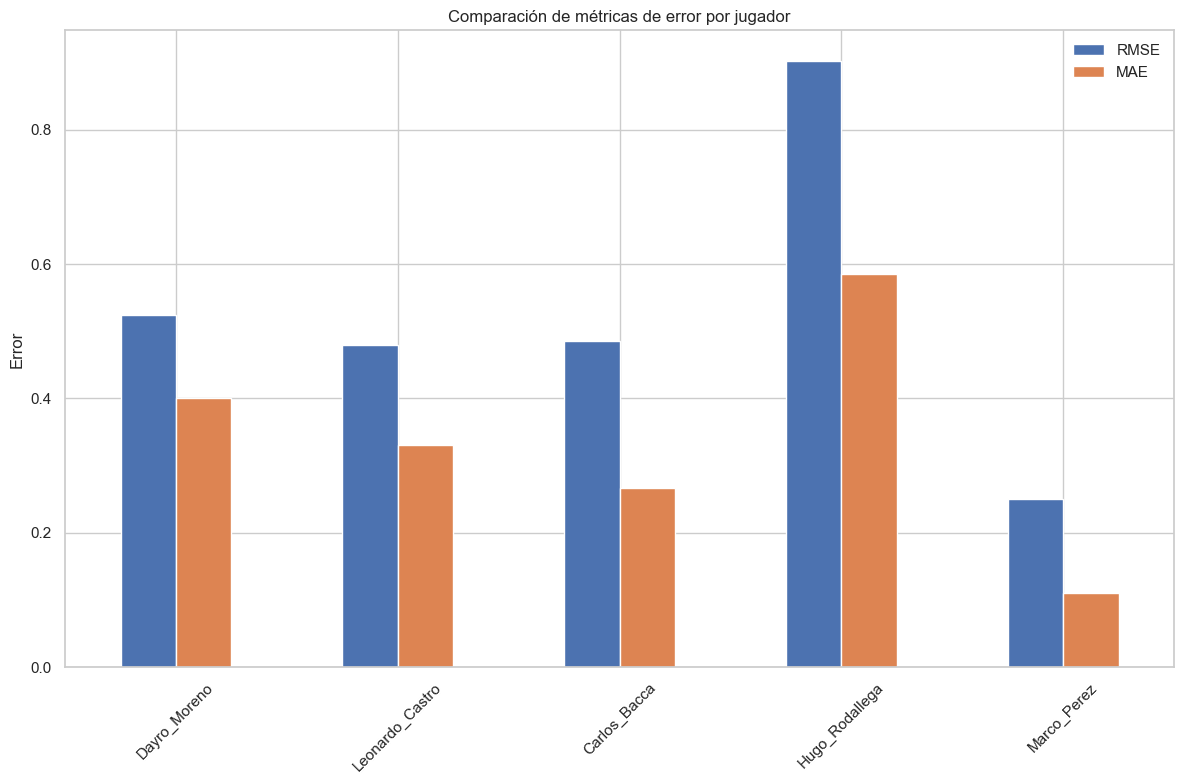

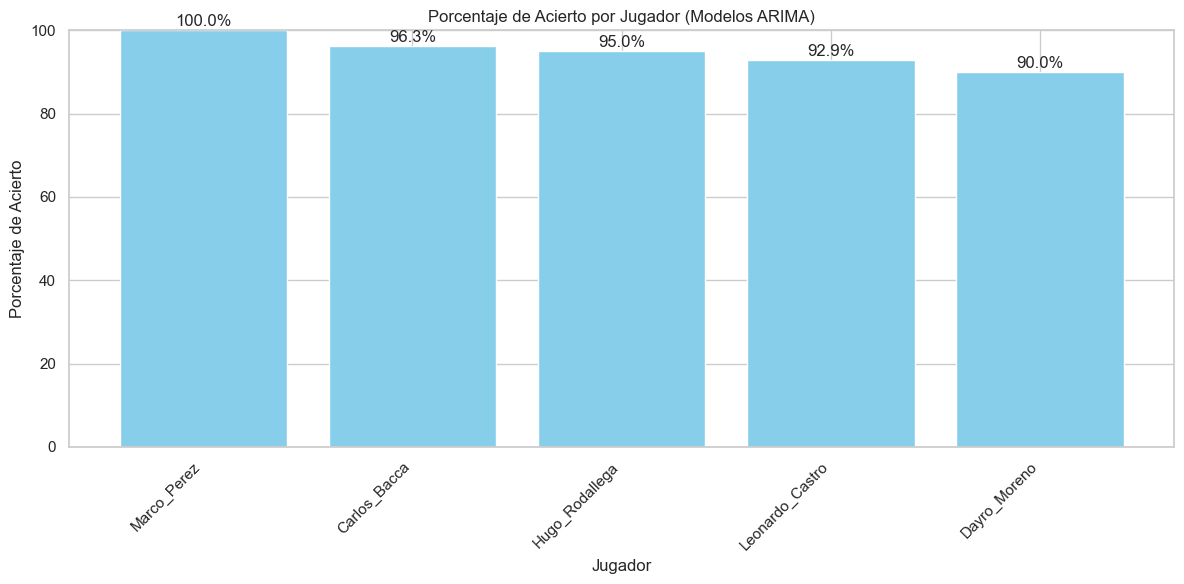


¡Entrenamiento y evaluación de modelos ARIMA completados!
Todos los modelos han sido guardados en la carpeta 'modelos_arima/'


In [4]:
# Crear directorio para guardar modelos si no existe
if not os.path.exists('modelos_arima'):
    os.makedirs('modelos_arima')

print("Iniciando entrenamiento de modelos ARIMA/ARIMAX para cada jugador...")

# Parámetros para división de datos
test_size = 0.2  # Último 20% de datos para prueba

# Diccionarios para almacenar resultados
modelos = {}
metricas = {}
predicciones = {}
aciertos_porcentaje = {}

# Cargar estadísticas de normalización
try:
    with open('stats_normalizacion.pkl', 'rb') as f:
        stats_normalizacion = pickle.load(f)
    print("Estadísticas de normalización cargadas correctamente.")
except:
    print("No se encontró archivo de estadísticas de normalización.")
    stats_normalizacion = {}

# Función para calcular porcentaje de acierto (diferencia menor a 1 gol)
def calcular_porcentaje_acierto(y_true, y_pred):
    aciertos = np.sum(np.abs(y_true - np.array(y_pred)) < 1)
    return (aciertos / len(y_true)) * 100

# Función para validación cruzada temporal
def validacion_cruzada_temporal(y, X, p_max=3, d_max=2, q_max=3, usar_exogenas=True):
    n = len(y)
    n_folds = min(5, n // 3)  # Al menos 3 observaciones por fold
    if n_folds < 2:
        return None, None  # No hay suficientes datos para validación cruzada
    
    # Tamaño de cada fold
    size = n // n_folds
    
    mejores_parametros = None
    mejor_error = float('inf')
    
    # Probar diferentes combinaciones de parámetros
    for p in range(p_max + 1):
        for d in range(d_max + 1):
            for q in range(q_max + 1):
                if p == 0 and q == 0:
                    continue  # Evitar modelo trivial
                
                errores = []
                
                # Para cada fold
                for i in range(n_folds):
                    test_start = i * size
                    test_end = test_start + size if i < n_folds - 1 else n
                    
                    # División train/test
                    y_train = y[:test_start]
                    y_test = y[test_start:test_end]
                    
                    if len(y_train) < 5:  # Necesitamos al menos 5 observaciones
                        continue
                    
                    # Si usamos variables exógenas
                    if usar_exogenas and X is not None:
                        X_train = X[:test_start]
                        X_test = X[test_start:test_end]
                        
                        try:
                            # Entrenar modelo
                            modelo = SARIMAX(
                                y_train,
                                exog=X_train,
                                order=(p, d, q),
                                enforce_stationarity=False,
                                enforce_invertibility=False
                            )
                            result = modelo.fit(disp=False)
                            
                            # Predecir
                            pred = result.forecast(steps=len(y_test), exog=X_test)
                            
                            # Calcular error
                            mse = mean_squared_error(y_test, pred)
                            errores.append(mse)
                        except:
                            # Si falla, asignar error alto
                            errores.append(float('inf'))
                    else:
                        try:
                            # Modelo sin exógenas
                            modelo = ARIMA(y_train, order=(p, d, q))
                            result = modelo.fit()
                            
                            # Predecir
                            pred = result.forecast(steps=len(y_test))
                            
                            # Calcular error
                            mse = mean_squared_error(y_test, pred)
                            errores.append(mse)
                        except:
                            errores.append(float('inf'))
                
                # Calcular error promedio para esta combinación
                if errores:
                    error_promedio = sum(errores) / len(errores)
                    
                    # Actualizar mejores parámetros si encontramos error menor
                    if error_promedio < mejor_error:
                        mejor_error = error_promedio
                        mejores_parametros = (p, d, q)
    
    return mejores_parametros, mejor_error

for jugador in top_jugadores:
    print(f"\n=== Entrenamiento para {jugador} ===")
    
    # Preparar series temporales a nivel de partido (no agregación mensual)
    df_partido = df_jugadores[jugador].sort_values(by='Fecha')
    
    # Establecer fecha como índice para las series temporales
    df_partido = df_partido.set_index('Fecha')
    
    # Seleccionar variable objetivo y predictores
    y = df_partido['Goles']
    
    # Seleccionar predictores (variables exógenas) - versión mejorada con variables normalizadas
    cols_predictores_base = ['Tiros a puerta', 'Tiros totales', 'Minutos', 
                        'Sede_Local', 'Sede_Visitante', 'Promedio_Historico_vs_Oponente']
    
    # Agregar versiones normalizadas si están disponibles
    cols_predictores_norm = []
    for col in ['Tiros a puerta', 'Tiros totales', 'Minutos']:
        if f"{col}_norm" in df_partido.columns:
            cols_predictores_norm.append(f"{col}_norm")
    
    # Agregar tendencia reciente si está disponible
    if 'Tendencia_Reciente' in df_partido.columns:
        cols_predictores_base.append('Tendencia_Reciente')
    
    # Usar versiones normalizadas si están disponibles, sino usar originales
    if cols_predictores_norm:
        cols_predictores = list(set(cols_predictores_base) - set(['Tiros a puerta', 'Tiros totales', 'Minutos']))
        cols_predictores.extend(cols_predictores_norm)
    else:
        cols_predictores = cols_predictores_base
        
    X = df_partido[cols_predictores].select_dtypes(include=['number'])
    
    if len(y) < 12:
        print(f"Insuficientes datos para {jugador}. Se necesitan al menos 12 observaciones.")
        continue
    
    # División en conjuntos de entrenamiento y prueba
    train_size = int(len(y) * (1 - test_size))
    y_train, y_test = y[:train_size], y[train_size:]
    X_train, X_test = X[:train_size], X[train_size:]
    
    print(f"Conjunto de entrenamiento: {y_train.shape[0]} partidos")
    print(f"Conjunto de prueba: {y_test.shape[0]} partidos")
    
    # Verificar si hay suficientes variables exógenas
    if not X.empty:
        print(f"Entrenando modelo ARIMAX con {len(X.columns)} variables exógenas")
        usar_exogenas = True
    else:
        print("Entrenando modelo ARIMA sin variables exógenas")
        usar_exogenas = False
    
    # MEJORA: Usar validación cruzada temporal
    print("Ejecutando validación cruzada temporal para selección de parámetros...")
    parametros_cv, error_cv = validacion_cruzada_temporal(y_train, X_train if usar_exogenas else None)
    
    if parametros_cv:
        print(f"Mejores parámetros según validación cruzada: ARIMA{parametros_cv} (MSE: {error_cv:.4f})")
        orden = parametros_cv
    else:
        print("No se pudo realizar validación cruzada. Usando auto_arima...")
        try:
            if usar_exogenas:
                # Auto ARIMA con variables exógenas
                modelo_auto = pm.auto_arima(
                    y_train,
                    exogenous=X_train,
                    start_p=0, start_q=0,
                    max_p=3, max_q=3, max_d=2,
                    seasonal=False,  # Configurar como True si hay estacionalidad
                    information_criterion='aic',
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True
                )
            else:
                # Auto ARIMA sin variables exógenas
                modelo_auto = pm.auto_arima(
                    y_train,
                    start_p=0, start_q=0,
                    max_p=3, max_q=3, max_d=2,
                    seasonal=False,
                    information_criterion='aic',
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True
                )
            
            # Obtener los mejores parámetros
            orden = modelo_auto.order
            print(f"Mejores parámetros según auto_arima: ARIMA{orden}")
        except Exception as e:
            print(f"Error en auto_arima: {str(e)}")
            print("Usando parámetros por defecto: ARIMA(1,1,1)")
            orden = (1, 1, 1)
    
    try:
        # 2. Entrenamiento del modelo final usando los parámetros óptimos
        print("Entrenando modelo final...")
        if usar_exogenas:
            # Modelo SARIMAX con variables exógenas
            modelo = SARIMAX(
                y_train,
                exog=X_train,
                order=orden,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            resultados = modelo.fit(disp=False)
        else:
            # Modelo ARIMA simple
            modelo = ARIMA(y_train, order=orden)
            resultados = modelo.fit()
        
        # 3. Evaluación del modelo
        print("Evaluando modelo...")
        if usar_exogenas:
            # Predicciones en conjunto de prueba
            y_pred = resultados.forecast(steps=len(y_test), exog=X_test)
        else:
            # Predicciones sin exógenas
            y_pred = resultados.forecast(steps=len(y_test))
        
        # Asegurar que las predicciones no sean negativas
        y_pred = np.maximum(0, y_pred)
        
        # Métricas de evaluación
        mse = mean_squared_error(y_test, y_pred)
        rmse = math.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        porcentaje_acierto = calcular_porcentaje_acierto(y_test, y_pred)
        
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"Porcentaje de acierto: {porcentaje_acierto:.2f}%")
        
        # 4. Predicciones para próximos partidos
        print("Generando predicciones para próximos partidos...")
        
        # Para predicciones futuras, usamos los últimos valores como referencia
        if usar_exogenas:
            # Promedios de las últimas 5 observaciones o todas si hay menos
            n_ultimos = min(5, len(X))
            ultimos_x = X.iloc[-n_ultimos:].mean().values.reshape(1, -1)
            
            # Repetir para los próximos 3 partidos
            x_future = np.tile(ultimos_x, (3, 1))
            
            # Predicción para los próximos 3 partidos
            pred_future = resultados.forecast(steps=3, exog=x_future)
        else:
            # Predicción sin exógenas
            pred_future = resultados.forecast(steps=3)
        
        # Asegurar que las predicciones no sean negativas
        pred_future = np.maximum(0, pred_future)
        
        print(f"Predicción para próximos 3 partidos: {pred_future.values}")
        
        # 5. Guardar resultados y modelo
        modelos[jugador] = resultados
        metricas[jugador] = {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'Porcentaje_Acierto': porcentaje_acierto
        }
        predicciones[jugador] = {
            'test_pred': y_pred,
            'test_real': y_test,
            'future_pred': pred_future
        }
        
        # Guardar modelo en archivo pickle con toda la información necesaria
        ruta_modelo = f"modelos_arima/arima_{jugador.replace(' ', '_')}.pkl"
        with open(ruta_modelo, 'wb') as file:
            # Crear diccionario con toda la información relevante
            modelo_guardado = {
                'modelo_entrenado': resultados,  # Objeto ya entrenado (con fit aplicado)
                'modelo_config': {  # Configuración del modelo
                    'orden': orden,
                    'usa_exogenas': usar_exogenas,
                    'variables_exogenas': list(X.columns) if usar_exogenas else [],
                    'tipo_modelo': 'SARIMAX' if usar_exogenas else 'ARIMA'
                },
                'datos_entrenamiento': {  # Información sobre los datos de entrenamiento
                    'periodo_inicio': str(y_train.index.min()),
                    'periodo_fin': str(y_train.index.max()),
                    'num_observaciones': len(y_train)
                },
                'metricas': {  # Resultados de evaluación
                    'RMSE': rmse,
                    'MAE': mae,
                    'Acierto': porcentaje_acierto,
                    'MSE': mse
                },
                'normalizacion': stats_normalizacion.get(jugador, {})  # Información de normalización
            }
            
            # Verificación adicional antes de guardar
            if not hasattr(resultados, 'predict'):
                print(f"¡Advertencia! El modelo para {jugador} no tiene método predict")
            
            pickle.dump(modelo_guardado, file, protocol=pickle.HIGHEST_PROTOCOL)

        print(f"Modelo guardado correctamente en: {ruta_modelo}")
        print(f"  - Tipo: {'ARIMAX' if usar_exogenas else 'ARIMA'}{orden}")
        print(f"  - Métricas: RMSE={rmse:.2f}, MAE={mae:.2f}, Acierto={porcentaje_acierto:.1f}%")
        
        # Guardar porcentaje de acierto para comparación final
        aciertos_porcentaje[jugador] = {
            'Modelo': f"ARIMA{orden}",
            'RMSE': rmse,
            'MAE': mae,
            'Acierto (%)': porcentaje_acierto
        }
        
        # 6. Visualización de resultados
        plt.figure(figsize=(14, 7))
        
        # Datos históricos completos
        plt.plot(y.index, y.values, label='Histórico', color='blue')
        
        # Predicciones en conjunto de prueba
        plt.plot(y_test.index, y_pred, label='Predicciones', color='red', linestyle='--')
        
        # Predicciones futuras (próximos 3 partidos)
        # Asumimos misma frecuencia que los últimos partidos para proyectar fechas futuras
        intervalos = []
        for i in range(1, min(4, len(y))):
            intervalos.append((y.index[-i] - y.index[-(i+1)]).days)
        intervalo_promedio = max(int(np.mean(intervalos)), 3)  # Al menos 3 días
        
        future_dates = [y.index[-1] + timedelta(days=intervalo_promedio * (i+1)) for i in range(3)]
        plt.plot(future_dates, pred_future, label='Pronóstico', color='green', linestyle='--')
        
        plt.title(f'Modelo ARIMA{orden} para {jugador}')
        plt.xlabel('Fecha')
        plt.ylabel('Goles')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error al entrenar modelo para {jugador}: {str(e)}")
        import traceback
        traceback.print_exc()

# Comparación de rendimiento entre jugadores
if metricas:
    print("\n=== Comparación de rendimiento entre jugadores ===")
    
    # Crear DataFrame para comparación
    df_comparacion = pd.DataFrame.from_dict(aciertos_porcentaje, orient='index')
    df_comparacion = df_comparacion.sort_values('Acierto (%)', ascending=False)
    
    print(df_comparacion)
    
    # Visualización de métricas de error
    plt.figure(figsize=(12, 6))
    error_data = pd.DataFrame({
        'RMSE': [metricas[jugador]['RMSE'] for jugador in metricas],
        'MAE': [metricas[jugador]['MAE'] for jugador in metricas]
    }, index=metricas.keys())
    error_data.plot(kind='bar')
    plt.title('Comparación de métricas de error por jugador')
    plt.ylabel('Error')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Visualización del porcentaje de acierto
    plt.figure(figsize=(12, 6))
    plt.bar(df_comparacion.index, df_comparacion['Acierto (%)'], color='skyblue')
    plt.title('Porcentaje de Acierto por Jugador (Modelos ARIMA)')
    plt.xlabel('Jugador')
    plt.ylabel('Porcentaje de Acierto')
    plt.ylim(0, 100)
    for i, v in enumerate(df_comparacion['Acierto (%)']):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print("\n¡Entrenamiento y evaluación de modelos ARIMA completados!")
print(f"Todos los modelos han sido guardados en la carpeta 'modelos_arima/'")

**Predecir goles**

In [ ]:
# Función para cargar un modelo guardado previamente
def cargar_modelo(ruta_modelo):
    with open(ruta_modelo, 'rb') as file:
        modelo_guardado = pickle.load(file)
    return modelo_guardado

# Función para estandarizar nombres de equipos
def estandarizar_nombre_equipo(nombre):
    # Mapeo de nombres de equipos en el calendario a nombres estandarizados
    mapeo_equipos = {
        'Atlético Junior': 'Junior',
        'Junior': 'Junior',
        'Nacional': 'Atletico Nacional',
        'Deportivo Pereira': 'Pereira',
        'Atlético Bucaramanga': 'Bucaramanga',
        'Bucaramanga': 'Bucaramanga',
        'Santa Fe': 'Independiente Santa Fe',
        'Independiente Santa Fe': 'Independiente Santa Fe',
        'Cali': 'Deportivo Cali',
        'Deportivo Cali': 'Deportivo Cali',
        'America': 'CD América',
        'Millonarios': 'Millonarios',
        'Once Caldas': 'Once Caldas',
        'Águilas Doradas': 'Águilas Doradas',
        'La Equidad': 'La Equidad',
        'Envigado': 'Envigado',
        'Fortaleza': 'Fortaleza CEIF',
        'Unión Magdalena': 'Unión Magdalena',
        'Pasto': 'Deportivo Pasto',
        'Deportivo Pasto': 'Deportivo Pasto',
        'Tolima': 'Deportes Tolima',
        'Deportes Tolima': 'Deportes Tolima',
        'Alianza': 'Alianza FC',
        'Medellín': 'Medellin',
        'Chicó': 'Boyacá Chicó',
        'Llaneros': 'Llaneros'
    }
    
    # Si el nombre está en el mapeo, devuelve la versión estandarizada
    if nombre in mapeo_equipos:
        return mapeo_equipos[nombre]
    return nombre

# Función para estandarizar nombres de jugadores
def estandarizar_nombre_jugador(nombre):
    # Mapeo del nombre con guión bajo al nombre normal
    mapeo_jugadores = {
        'Carlos_Bacca': 'Carlos Bacca',
        'Dayro_Moreno': 'Dayro Moreno',
        'Hugo_Rodallega': 'Hugo Rodallega',
        'Leonardo_Castro': 'Leonardo Castro',
        'Marco_Perez': 'Marco Perez'
    }
    
    if nombre in mapeo_jugadores:
        return mapeo_jugadores[nombre]
    return nombre

# Función para estandarizar nombres de jugadores en formato inverso
def estandarizar_nombre_jugador_inverso(nombre):
    # Mapeo del nombre normal al nombre con guión bajo
    mapeo_jugadores = {
        'Carlos Bacca': 'Carlos_Bacca',
        'Dayro Moreno': 'Dayro_Moreno',
        'Hugo Rodallega': 'Hugo_Rodallega',
        'Leonardo Castro': 'Leonardo_Castro',
        'Marco Perez': 'Marco_Perez'
    }
    
    if nombre in mapeo_jugadores:
        return mapeo_jugadores[nombre]
    return nombre

# Función mejorada para obtener variables exógenas para un jugador y oponente
# Función mejorada para obtener variables exógenas para un jugador y oponente
def obtener_exogenas_mejorado(datos_historicos, jugador, oponente, es_local, info_normalizacion=None):
    # Filtrar por jugador
    jugador_id = estandarizar_nombre_jugador_inverso(jugador)
    df_jugador = datos_historicos[datos_historicos['Jugador'] == jugador_id].copy()
    
    if len(df_jugador) == 0:
        return None, None, None, None, None, None, None
    
    # Estadísticas generales para el jugador
    promedio_goles_general = df_jugador['Goles'].mean()
    total_goles_historicos = df_jugador['Goles'].sum()
    total_partidos = len(df_jugador)
    
    # Rendimiento local/visitante
    goles_local = df_jugador[df_jugador['Sede_Local'] == 1]['Goles'].mean() if 'Sede_Local' in df_jugador.columns else None
    goles_visitante = df_jugador[df_jugador['Sede_Visitante'] == 1]['Goles'].mean() if 'Sede_Visitante' in df_jugador.columns else None
    
    # MEJORA: Siempre calcular minutos promedio de los últimos partidos, independientemente del oponente
    n_recientes = min(5, len(df_jugador))
    df_recientes = df_jugador.sort_values('Fecha', ascending=False).head(n_recientes)
    minutos = df_recientes['Minutos'].mean()
    
    # Si no hay datos de minutos en los últimos partidos, usar promedio general
    if pd.isna(minutos):
        minutos = df_jugador['Minutos'].mean()
        # Si aún es NaN, usar valor por defecto
        if pd.isna(minutos):
            minutos = 90.0
    
    # Filtrar por oponente para otras estadísticas
    df_oponente = df_jugador[df_jugador['Oponente_Estandarizado'] == oponente].copy()
    
    # Si no hay datos para este oponente específico, usar datos recientes
    if len(df_oponente) == 0:
        # Usar los últimos 5 partidos para estadísticas generales
        tiros_puerta = df_recientes['Tiros a puerta'].mean()
        tiros_totales = df_recientes['Tiros totales'].mean()
        promedio_goles = df_recientes['Goles'].mean()
        partidos_vs_oponente = 0
        
        # Calcular tendencia reciente (proporción entre rendimiento reciente y promedio general)
        tendencia_reciente = promedio_goles / promedio_goles_general if promedio_goles_general > 0 else 1.0
    else:
        tiros_puerta = df_oponente['Tiros a puerta'].mean()
        tiros_totales = df_oponente['Tiros totales'].mean()
        promedio_goles = df_oponente['Goles'].mean()
        partidos_vs_oponente = len(df_oponente)
        
        # Calcular tendencia para este oponente específico
        if 'Fecha' in df_oponente.columns:
            df_oponente_reciente = df_oponente.sort_values('Fecha', ascending=False).head(3)
            goles_recientes_vs_oponente = df_oponente_reciente['Goles'].mean() if len(df_oponente_reciente) > 0 else promedio_goles
            tendencia_reciente = goles_recientes_vs_oponente / promedio_goles if promedio_goles > 0 else 1.0
        else:
            tendencia_reciente = 1.0
    
    # Manejar otros valores NaN
    if pd.isna(tiros_puerta):
        tiros_puerta = df_recientes['Tiros a puerta'].mean()
        if pd.isna(tiros_puerta):  # Si aún es NaN
            tiros_puerta = 1.5
    
    if pd.isna(tiros_totales):
        tiros_totales = df_recientes['Tiros totales'].mean()
        if pd.isna(tiros_totales):  # Si aún es NaN
            tiros_totales = 2.5
    
    if pd.isna(promedio_goles):
        promedio_goles = promedio_goles_general if not pd.isna(promedio_goles_general) else 0.0
    
    if pd.isna(tendencia_reciente):
        tendencia_reciente = 1.0
    
    # Normalizar variables si hay información de normalización disponible
    variables_normalizadas = {}
    if info_normalizacion:
        for var_name, var_value in [('Tiros a puerta', tiros_puerta), 
                                  ('Tiros totales', tiros_totales), 
                                  ('Minutos', minutos)]:
            if var_name in info_normalizacion:
                mean_val = info_normalizacion[var_name]['mean']
                std_val = info_normalizacion[var_name]['std']
                if std_val > 0:
                    variables_normalizadas[f"{var_name}_norm"] = (var_value - mean_val) / std_val
    
    # Crear array de variables exógenas
    exog_array = np.array([
        tiros_puerta, 
        tiros_totales, 
        minutos,
        1 if es_local else 0,  # Sede_Local
        0 if es_local else 1,  # Sede_Visitante
        promedio_goles,        # Promedio_Historico_vs_Oponente
        tendencia_reciente     # Tendencia_Reciente
    ]).reshape(1, -1)  # Reshape para formato correcto
    
    # Estadísticas adicionales para el CSV
    estadisticas_historicas = {
        'Promedio_Goles_General': promedio_goles_general,
        'Total_Goles_Historicos': total_goles_historicos,
        'Total_Partidos': total_partidos,
        'Promedio_Goles_Local': goles_local,
        'Promedio_Goles_Visitante': goles_visitante,
        'Partidos_vs_Oponente': partidos_vs_oponente,
        'Minutos_Promedio': minutos,  # Añadir minutos promedio a las estadísticas
        'Tendencia_Reciente': tendencia_reciente  # Añadir tendencia reciente
    }
    
    return exog_array, tiros_puerta, tiros_totales, minutos, promedio_goles, estadisticas_historicas, variables_normalizadas

# Función para obtener la configuración básica del modelo (versión mejorada)
def obtener_config_modelo(modelo_guardado):
    modelo_entrenado = modelo_guardado['modelo_entrenado']
    config = modelo_guardado['modelo_config']
    
    info_modelo = {
        'tipo_modelo': config['tipo_modelo'],
        'orden_arima': config['orden'],
        'usa_exogenas': config['usa_exogenas'],
        'variables_exogenas': config.get('variables_exogenas', [])
    }
    
    # Agregar información de normalización si está disponible
    normalizacion = modelo_guardado.get('normalizacion', {})
    
    return modelo_entrenado, info_modelo, normalizacion

# Función principal para hacer predicciones (versión mejorada)
def predecir_goles_calendario_2025(ruta_calendario, carpeta_modelos, ruta_datos_historicos):
    print(" Iniciando sistema de predicción de goles...")
    print(" Cargando datos históricos y calendario...")
    
    # Cargar datos históricos
    datos_historicos = pd.read_csv(ruta_datos_historicos)
    datos_historicos['Fecha'] = pd.to_datetime(datos_historicos['Fecha'], errors='coerce')
    
    # Cargar el calendario
    calendario = pd.read_csv(ruta_calendario)
    calendario['Fecha'] = pd.to_datetime(calendario['Fecha'])
    
    # Estandarizar nombres de equipos y jugadores
    calendario['Equipo_Local_Estandarizado'] = calendario['Equipo_Local'].apply(estandarizar_nombre_equipo)
    calendario['Equipo_Visitante_Estandarizado'] = calendario['Equipo_Visitante'].apply(estandarizar_nombre_equipo)
    calendario['Jugador_Estandarizado'] = calendario['Jugador'].apply(estandarizar_nombre_jugador)
    
    # Equipos de los jugadores
    equipos_jugadores = {
        'Carlos Bacca': 'Junior',
        'Dayro Moreno': 'Once Caldas',
        'Hugo Rodallega': 'Independiente Santa Fe',
        'Leonardo Castro': 'Millonarios',
        'Marco Perez': 'Junior'
    }
    
    # Agregar columna con el equipo del jugador
    calendario['Equipo_Jugador'] = calendario['Jugador_Estandarizado'].map(equipos_jugadores)
    
    # Determinar si el jugador juega como local o visitante
    calendario['Es_Local'] = calendario.apply(
        lambda row: row['Equipo_Local_Estandarizado'] == row['Equipo_Jugador'], 
        axis=1
    )
    
    # Identificar el equipo oponente
    calendario['Oponente'] = calendario.apply(
        lambda row: row['Equipo_Visitante_Estandarizado'] if row['Es_Local'] else row['Equipo_Local_Estandarizado'], 
        axis=1
    )
    
    # Preparar el dataframe para almacenar las predicciones con columnas adicionales
    predicciones = calendario[['Fecha_Numero', 'Fecha', 'Jugador_Estandarizado', 'Equipo_Local_Estandarizado', 
                              'Equipo_Visitante_Estandarizado', 'Es_Local', 'Oponente']].copy()
    
    # Columnas para la predicción y variables utilizadas
    predicciones['Prediccion_Goles'] = 0.0
    predicciones['Tiros_Puerta_Estimados'] = 0.0
    predicciones['Tiros_Totales_Estimados'] = 0.0
    predicciones['Minutos_Estimados'] = 0.0
    predicciones['Promedio_Historico_vs_Oponente'] = 0.0
    predicciones['Tendencia_Reciente'] = 0.0
    
    # Columnas para información del modelo
    predicciones['Tipo_Modelo'] = ''
    predicciones['Orden_ARIMA'] = ''
    predicciones['Usa_Exogenas'] = False
    predicciones['RMSE_Modelo'] = 0.0
    predicciones['Porcentaje_Acierto_Modelo'] = 0.0
    
    # Columnas para estadísticas históricas del jugador
    predicciones['Promedio_Goles_General'] = 0.0
    predicciones['Total_Goles_Historicos'] = 0
    predicciones['Total_Partidos'] = 0
    predicciones['Promedio_Goles_Local'] = 0.0
    predicciones['Promedio_Goles_Visitante'] = 0.0
    predicciones['Partidos_vs_Oponente'] = 0
    
    print("\nRealizando predicciones para cada jugador...")
    
    # Para cada jugador único en el calendario
    jugadores_unicos = calendario['Jugador_Estandarizado'].unique()
    
    for jugador in jugadores_unicos:
        print(f"\n Procesando: {jugador}")
        
        # Nombre del archivo del modelo
        nombre_archivo = f"arima_{jugador.replace(' ', '_')}.pkl"
        ruta_modelo = os.path.join(carpeta_modelos, nombre_archivo)
        
        # Verificar si existe el modelo para este jugador
        if not os.path.exists(ruta_modelo):
            print(f"    No se encontró modelo para {jugador}")
            continue
        
        try:
            # Cargar el modelo
            modelo_guardado = cargar_modelo(ruta_modelo)
            print(f"    Modelo cargado: {nombre_archivo}")
            
            # Obtener configuración del modelo
            modelo_entrenado, info_modelo, normalizacion = obtener_config_modelo(modelo_guardado)
            usa_exogenas = info_modelo['usa_exogenas']
            variables_exogenas = info_modelo['variables_exogenas']
            orden_arima = str(info_modelo['orden_arima'])
            tipo_modelo = info_modelo['tipo_modelo']
            
            # Obtener métricas del modelo
            metricas = modelo_guardado.get('metricas', {})
            rmse = metricas.get('RMSE', 0.0)
            porcentaje_acierto = metricas.get('Acierto', 0.0)
            
            print(f"    Tipo: {tipo_modelo}{orden_arima} | Usa exógenas: {'Sí' if usa_exogenas else 'No'} | RMSE: {rmse:.2f}")
            
            # Filtrar el calendario para este jugador
            partidos_jugador = calendario[calendario['Jugador_Estandarizado'] == jugador]
            
            # Procesar TODOS los partidos para este jugador
            print(f"    Prediciendo {len(partidos_jugador)} partidos...")
            
            # Usar barra de progreso para los partidos
            for idx, partido in tqdm(partidos_jugador.iterrows(), total=len(partidos_jugador), 
                                   desc="   Prediciendo", ncols=80):
                oponente = partido['Oponente']
                es_local = partido['Es_Local']
                fecha = partido['Fecha']
                
                # Añadir información del modelo a todas las filas del jugador
                predicciones.loc[idx, 'Tipo_Modelo'] = tipo_modelo
                predicciones.loc[idx, 'Orden_ARIMA'] = orden_arima
                predicciones.loc[idx, 'Usa_Exogenas'] = usa_exogenas
                predicciones.loc[idx, 'RMSE_Modelo'] = rmse
                predicciones.loc[idx, 'Porcentaje_Acierto_Modelo'] = porcentaje_acierto
                
                if usa_exogenas:
                    # Obtener variables exógenas para este partido
                    exog_array, tiros_puerta, tiros_totales, minutos, promedio_goles, estadisticas, vars_norm = obtener_exogenas_mejorado(
                        datos_historicos, jugador, oponente, es_local, normalizacion)
                    
                    if exog_array is None:
                        continue
                    
                    # Guardar variables exógenas usadas en el dataframe
                    predicciones.loc[idx, 'Tiros_Puerta_Estimados'] = tiros_puerta
                    predicciones.loc[idx, 'Tiros_Totales_Estimados'] = tiros_totales 
                    predicciones.loc[idx, 'Minutos_Estimados'] = minutos
                    predicciones.loc[idx, 'Promedio_Historico_vs_Oponente'] = promedio_goles
                    predicciones.loc[idx, 'Tendencia_Reciente'] = estadisticas.get('Tendencia_Reciente', 1.0)
                    
                    # Guardar estadísticas históricas
                    if estadisticas:
                        predicciones.loc[idx, 'Promedio_Goles_General'] = estadisticas['Promedio_Goles_General']
                        predicciones.loc[idx, 'Total_Goles_Historicos'] = estadisticas['Total_Goles_Historicos']
                        predicciones.loc[idx, 'Total_Partidos'] = estadisticas['Total_Partidos']
                        predicciones.loc[idx, 'Promedio_Goles_Local'] = estadisticas['Promedio_Goles_Local'] or 0.0
                        predicciones.loc[idx, 'Promedio_Goles_Visitante'] = estadisticas['Promedio_Goles_Visitante'] or 0.0
                        predicciones.loc[idx, 'Partidos_vs_Oponente'] = estadisticas['Partidos_vs_Oponente']
                    
                    # Preparar datos según el formato esperado por el modelo
                    # Verificar si el modelo usa variables normalizadas
                    usar_norm = any(var.endswith('_norm') for var in variables_exogenas)
                    
                    # Construir un DataFrame con las características necesarias
                    exog_df = pd.DataFrame(index=[0])
                    
                    # Para cada variable en las variables exógenas
                    for var in variables_exogenas:
                        if var.endswith('_norm') and vars_norm and var in vars_norm:
                            # Usar versión normalizada si está disponible
                            exog_df[var] = vars_norm[var]
                        elif var == 'Tiros a puerta' or var == 'Tiros_a_puerta':
                            exog_df[var] = tiros_puerta
                        elif var == 'Tiros totales' or var == 'Tiros_totales':
                            exog_df[var] = tiros_totales
                        elif var == 'Minutos':
                            exog_df[var] = minutos
                        elif var == 'Sede_Local':
                            exog_df[var] = 1 if es_local else 0
                        elif var == 'Sede_Visitante':
                            exog_df[var] = 0 if es_local else 1
                        elif var == 'Promedio_Historico_vs_Oponente':
                            exog_df[var] = promedio_goles
                        elif var == 'Tendencia_Reciente':
                            exog_df[var] = estadisticas.get('Tendencia_Reciente', 1.0)
                        else:
                            # Para otras variables no conocidas, usar 0
                            exog_df[var] = 0
                    
                    # Predicción directa con formato correcto
                    try:
                        # Asegurarse de que las columnas estén en el mismo orden que en el entrenamiento
                        exog_final = exog_df[variables_exogenas]
                        prediccion = modelo_entrenado.forecast(steps=1, exog=exog_final)
                        prediccion_valor = max(0, float(prediccion.iloc[0] if hasattr(prediccion, 'iloc') else prediccion[0]))
                        predicciones.loc[idx, 'Prediccion_Goles'] = round(prediccion_valor, 2)
                        
                    except Exception as e:
                        # Si falla la predicción, intentar formatos alternativos
                        try:
                            # Intentar con array plano si el DataFrame no funciona
                            exog_valores = exog_df[variables_exogenas].values.flatten()
                            prediccion = modelo_entrenado.forecast(steps=1, exog=exog_valores.reshape(1, -1))
                            prediccion_valor = max(0, float(prediccion.iloc[0] if hasattr(prediccion, 'iloc') else prediccion[0]))
                            predicciones.loc[idx, 'Prediccion_Goles'] = round(prediccion_valor, 2)
                            
                        except:
                            # Como último recurso, usar el promedio histórico
                            predicciones.loc[idx, 'Prediccion_Goles'] = round(promedio_goles, 2)
                            print(f"      Error en predicción para {jugador} vs {oponente}. Usando promedio histórico.")
                else:
                    # Predicción sin exógenas
                    try:
                        prediccion = modelo_entrenado.forecast(steps=1)
                        prediccion_valor = max(0, float(prediccion[0]))
                        predicciones.loc[idx, 'Prediccion_Goles'] = round(prediccion_valor, 2)
                    except:
                        # Si falla, usar promedio de goles del jugador como respaldo
                        promedio_goles = datos_historicos[datos_historicos['Jugador'] == estandarizar_nombre_jugador_inverso(jugador)]['Goles'].mean()
                        promedio_goles = 0.4 if pd.isna(promedio_goles) else promedio_goles
                        predicciones.loc[idx, 'Prediccion_Goles'] = round(promedio_goles, 2)
                        print(f"      Error en predicción ARIMA para {jugador}. Usando promedio histórico.")
            
            # Resumen para este jugador
            promedio = predicciones[predicciones['Jugador_Estandarizado'] == jugador]['Prediccion_Goles'].mean()
            maximo = predicciones[predicciones['Jugador_Estandarizado'] == jugador]['Prediccion_Goles'].max()
            print(f"    Resumen: {len(partidos_jugador)} partidos | Promedio: {promedio:.2f} | Máximo: {maximo:.2f}")
            
        except Exception as e:
            print(f"    Error al procesar modelo: {str(e)}")
            import traceback
            traceback.print_exc()
    
    # Ordenar por fecha y jugador
    predicciones = predicciones.sort_values(by=['Fecha', 'Jugador_Estandarizado'])
    
    # Redondear valores numéricos a 2 decimales
    columnas_numericas = ['Prediccion_Goles', 'Tiros_Puerta_Estimados', 'Tiros_Totales_Estimados', 
                          'Promedio_Historico_vs_Oponente', 'RMSE_Modelo', 'Porcentaje_Acierto_Modelo',
                          'Promedio_Goles_General', 'Promedio_Goles_Local', 'Promedio_Goles_Visitante',
                          'Tendencia_Reciente']
    
    for col in columnas_numericas:
        if col in predicciones.columns:
            predicciones[col] = predicciones[col].round(2)
    
    # Crear versión final para el CSV
    predicciones_final = predicciones.rename(columns={
        'Jugador_Estandarizado': 'Jugador',
        'Equipo_Local_Estandarizado': 'Equipo_Local',
        'Equipo_Visitante_Estandarizado': 'Equipo_Visitante',
        'Es_Local': 'Juega_Local',
        'Prediccion_Goles': 'Goles_Predichos'
    })
    
    # Añadir columnas calculadas adicionales para análisis
    predicciones_final['Diferencia_vs_Promedio'] = predicciones_final['Goles_Predichos'] - predicciones_final['Promedio_Historico_vs_Oponente']
    predicciones_final['Factor_Confianza'] = (100 - predicciones_final['RMSE_Modelo'] * 10).clip(0, 100)
    
    # Añadir categoría de predicción para facilitar el análisis
    predicciones_final['Categoria_Prediccion'] = pd.cut(
        predicciones_final['Goles_Predichos'],
        bins=[-0.01, 0.25, 0.75, 1.25, 1.75, 5],
        labels=['0 goles', '0-1 goles', '1 gol', '1-2 goles', '2+ goles']
    )
    
    # Guardar las predicciones en un archivo CSV
    ruta_salida = "predicciones_calendario_2025.csv"
    predicciones_final.to_csv(ruta_salida, index=False)
    
    print(f"\n Predicciones completadas y guardadas en {ruta_salida}")
    
    return predicciones_final

# Ejecución principal
if __name__ == "__main__":
    # Ruta del calendario y carpeta de modelos
    ruta_calendario = "calendario_2025.csv"
    carpeta_modelos = "modelos_arima"
    ruta_datos_historicos = "Goleadores_Procesados.csv"
    
    # Verificar que existan los archivos necesarios
    archivos_ok = True
    
    if not os.path.exists(ruta_calendario):
        print(f" Error: No se encontró el archivo {ruta_calendario}")
        archivos_ok = False
    if not os.path.exists(carpeta_modelos):
        print(f" Error: No se encontró la carpeta {carpeta_modelos}")
        archivos_ok = False
    if not os.path.exists(ruta_datos_historicos):
        print(f" Error: No se encontró el archivo {ruta_datos_historicos}")
        archivos_ok = False
    
    if archivos_ok:
   # Ejecutar predicciones
        predicciones = predecir_goles_calendario_2025(ruta_calendario, carpeta_modelos, ruta_datos_historicos)
        
        # Mostrar un resumen de las predicciones
        print("\n RESUMEN DE PREDICCIONES POR JUGADOR:")
        resumen = predicciones.groupby('Jugador')['Goles_Predichos'].agg(['mean', 'min', 'max', 'count'])
        resumen = resumen.sort_values('mean', ascending=False)
        print(resumen.round(2))

        # Mostrar jugadores con mejor predicción contra cada equipo
        print("\n MEJOR RENDIMIENTO PREDICHO CONTRA CADA EQUIPO:")
        mejores_por_oponente = predicciones.sort_values('Goles_Predichos', ascending=False).groupby('Oponente').first()[['Jugador', 'Goles_Predichos']]
        print(mejores_por_oponente.round(2))
        
        # Análisis de predicciones por categoría
        print("\n DISTRIBUCIÓN DE PREDICCIONES POR CATEGORÍA:")
        categorias = predicciones.groupby(['Jugador', 'Categoria_Prediccion']).size().unstack(fill_value=0)
        print(categorias)
        
        # Análisis de rendimiento local vs visitante
        print("\n RENDIMIENTO LOCAL VS VISITANTE:")
        local_vs_visitante = predicciones.groupby(['Jugador', 'Juega_Local'])['Goles_Predichos'].mean().unstack().round(2)
        local_vs_visitante.columns = ['Visitante', 'Local']
        local_vs_visitante['Diferencia'] = (local_vs_visitante['Local'] - local_vs_visitante['Visitante']).round(2)
        print(local_vs_visitante)
        
        print("\n ¡Proceso completado con éxito!")

 Iniciando sistema de predicción de goles...
 Cargando datos históricos y calendario...

Realizando predicciones para cada jugador...

 Procesando: Carlos Bacca
    Modelo cargado: arima_Carlos_Bacca.pkl
    Tipo: SARIMAX(0, 1, 2) | Usa exógenas: Sí | RMSE: 0.49
    Prediciendo 20 partidos...


   Prediciendo:   0%|                                    | 0/20 [00:00<?, ?it/s]

    Resumen: 20 partidos | Promedio: 0.38 | Máximo: 0.60

 Procesando: Marco Perez
    Modelo cargado: arima_Marco_Perez.pkl
    Tipo: SARIMAX(1, 0, 3) | Usa exógenas: Sí | RMSE: 0.25
    Prediciendo 20 partidos...


   Prediciendo:   0%|                                    | 0/20 [00:00<?, ?it/s]

    Resumen: 20 partidos | Promedio: 0.42 | Máximo: 1.19

 Procesando: Dayro Moreno
    Modelo cargado: arima_Dayro_Moreno.pkl
    Tipo: SARIMAX(1, 0, 1) | Usa exógenas: Sí | RMSE: 0.52
    Prediciendo 20 partidos...


   Prediciendo:   0%|                                    | 0/20 [00:00<?, ?it/s]

    Resumen: 20 partidos | Promedio: 0.49 | Máximo: 0.82

 Procesando: Hugo Rodallega
    Modelo cargado: arima_Hugo_Rodallega.pkl
    Tipo: SARIMAX(3, 0, 1) | Usa exógenas: Sí | RMSE: 0.90
    Prediciendo 20 partidos...


   Prediciendo:   0%|                                    | 0/20 [00:00<?, ?it/s]

    Resumen: 20 partidos | Promedio: 0.31 | Máximo: 0.51

 Procesando: Leonardo Castro
    Modelo cargado: arima_Leonardo_Castro.pkl
    Tipo: SARIMAX(2, 0, 0) | Usa exógenas: Sí | RMSE: 0.48
    Prediciendo 20 partidos...


   Prediciendo:   0%|                                    | 0/20 [00:00<?, ?it/s]

    Resumen: 20 partidos | Promedio: 0.44 | Máximo: 0.83

 Predicciones completadas y guardadas en predicciones_calendario_2025.csv

 RESUMEN DE PREDICCIONES POR JUGADOR:
                 mean  min  max  count
Jugador                               
Dayro Moreno     0.49 0.20 0.82     20
Leonardo Castro  0.44 0.00 0.83     20
Marco Perez      0.42 0.00 1.19     20
Carlos Bacca     0.38 0.10 0.60     20
Hugo Rodallega   0.31 0.03 0.51     20

 MEJOR RENDIMIENTO PREDICHO CONTRA CADA EQUIPO:
                                Jugador  Goles_Predichos
Oponente                                                
Alianza FC                 Dayro Moreno             0.72
América                    Dayro Moreno             0.66
Atletico Nacional       Leonardo Castro             0.53
Atlético Nacional          Carlos Bacca             0.54
Boyacá Chicó               Dayro Moreno             0.82
Bucaramanga             Leonardo Castro             0.56
CD América              Leonardo Castro            

**Analisis de predeccion**

Generando visualizaciones de las predicciones ARIMAX...


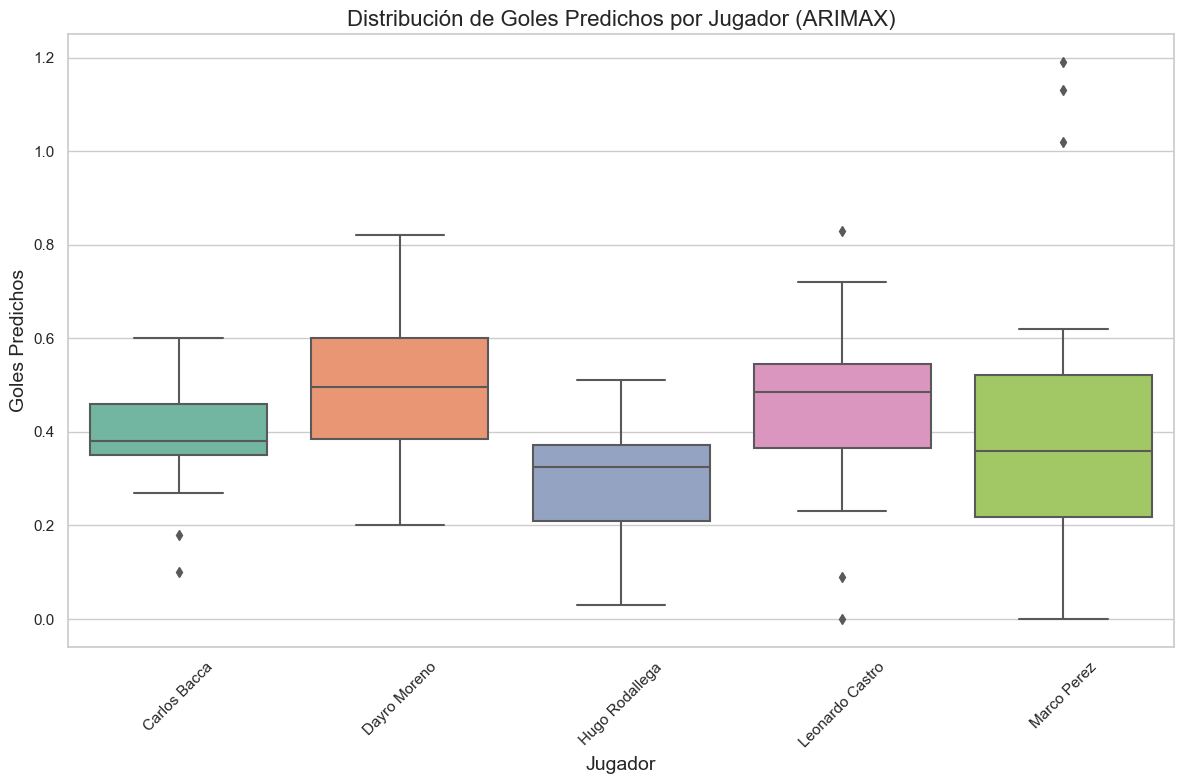

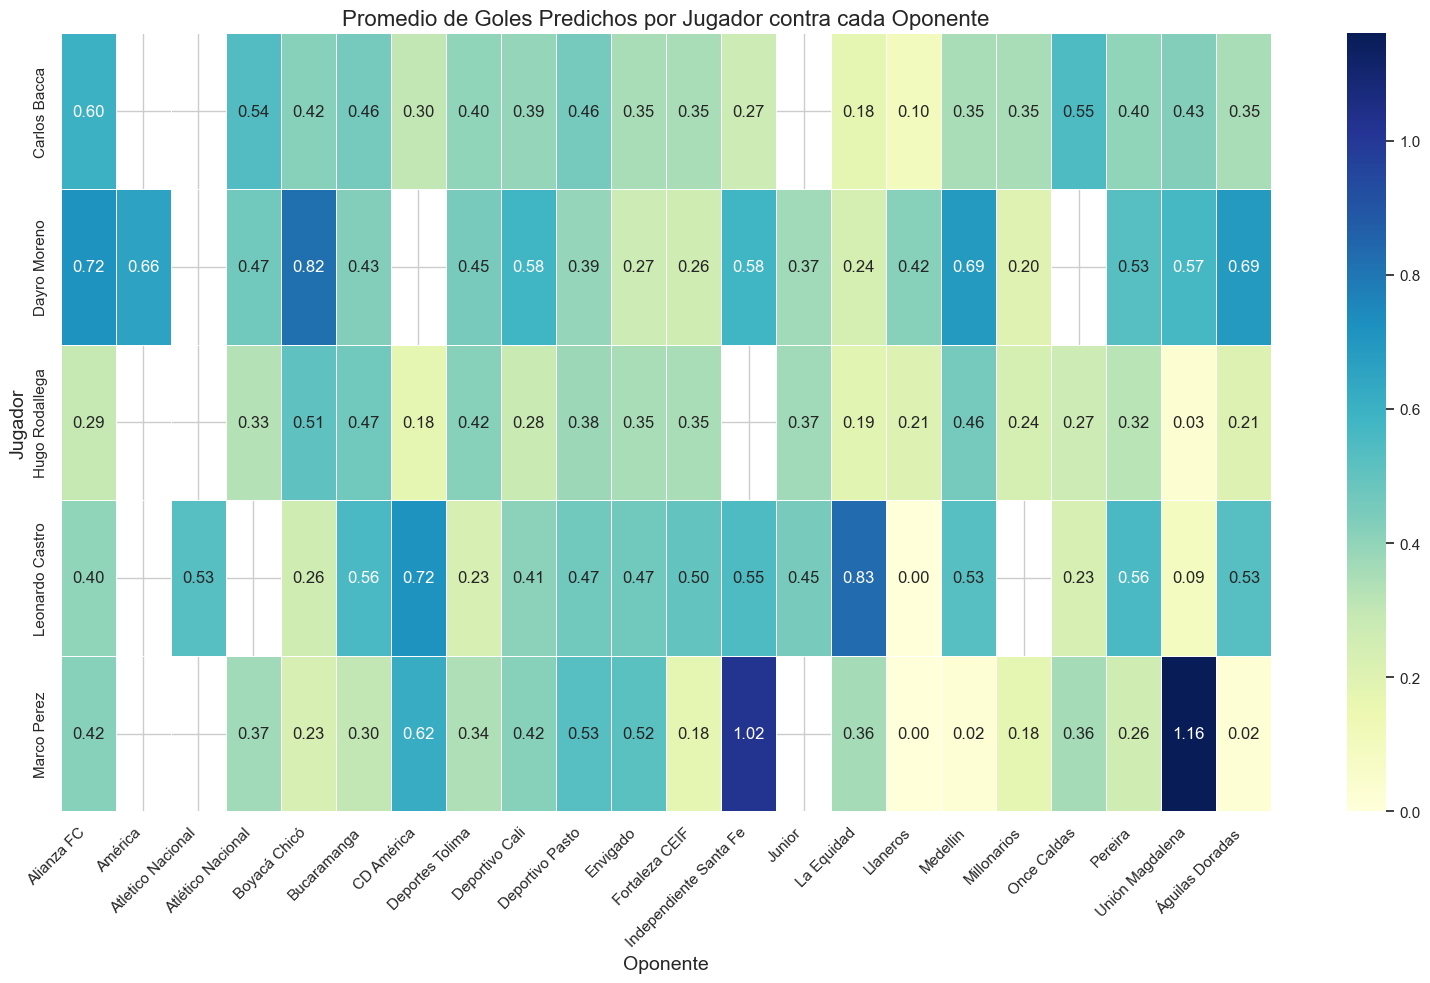

<Figure size 1400x700 with 0 Axes>

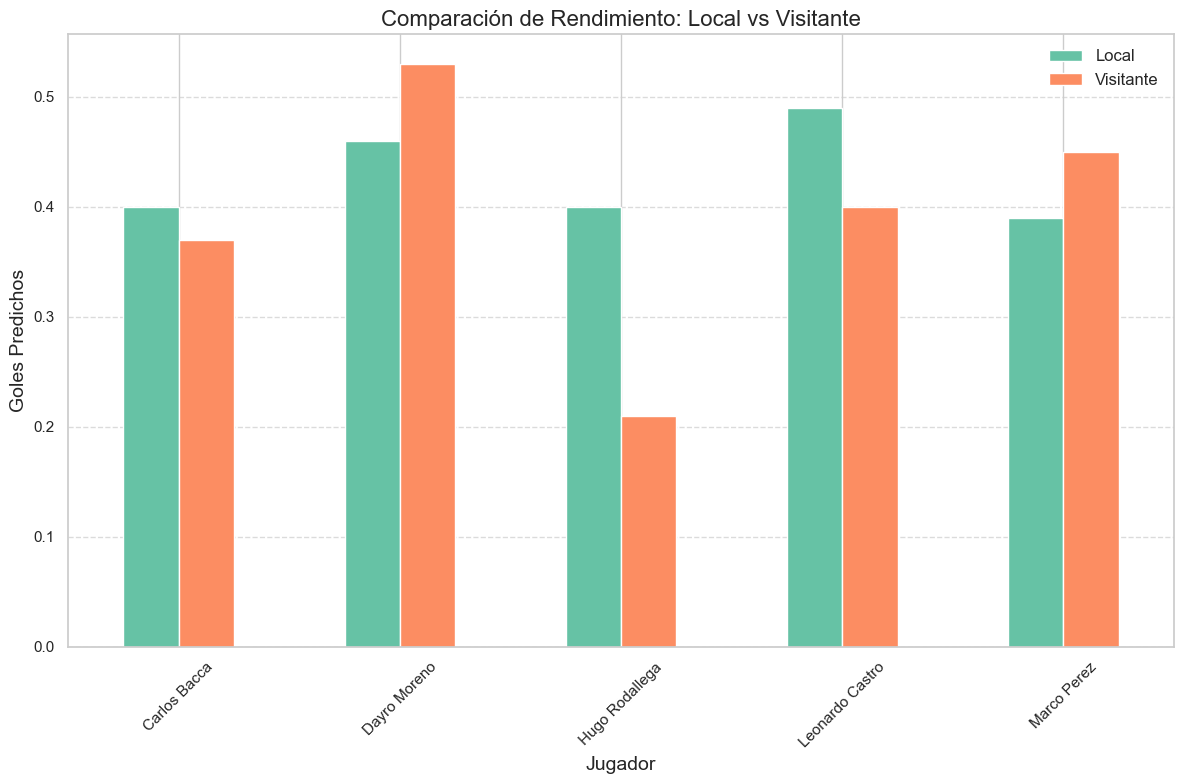

<Figure size 1400x800 with 0 Axes>

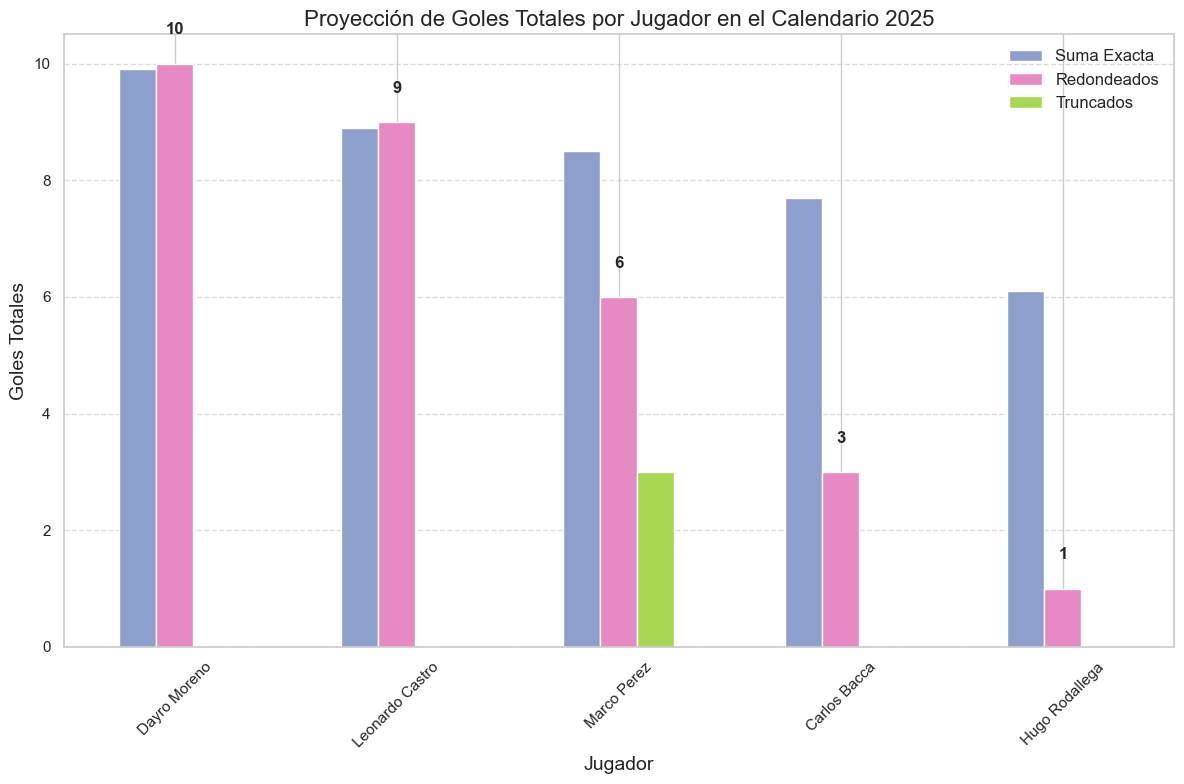

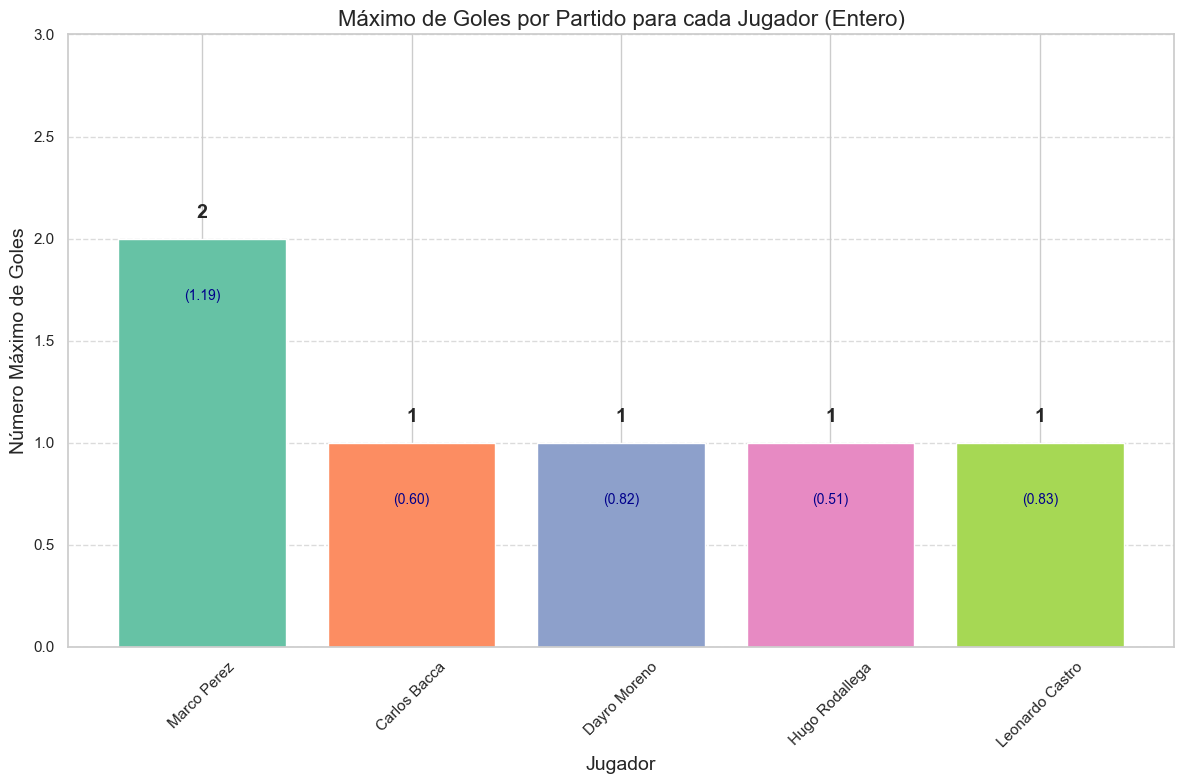

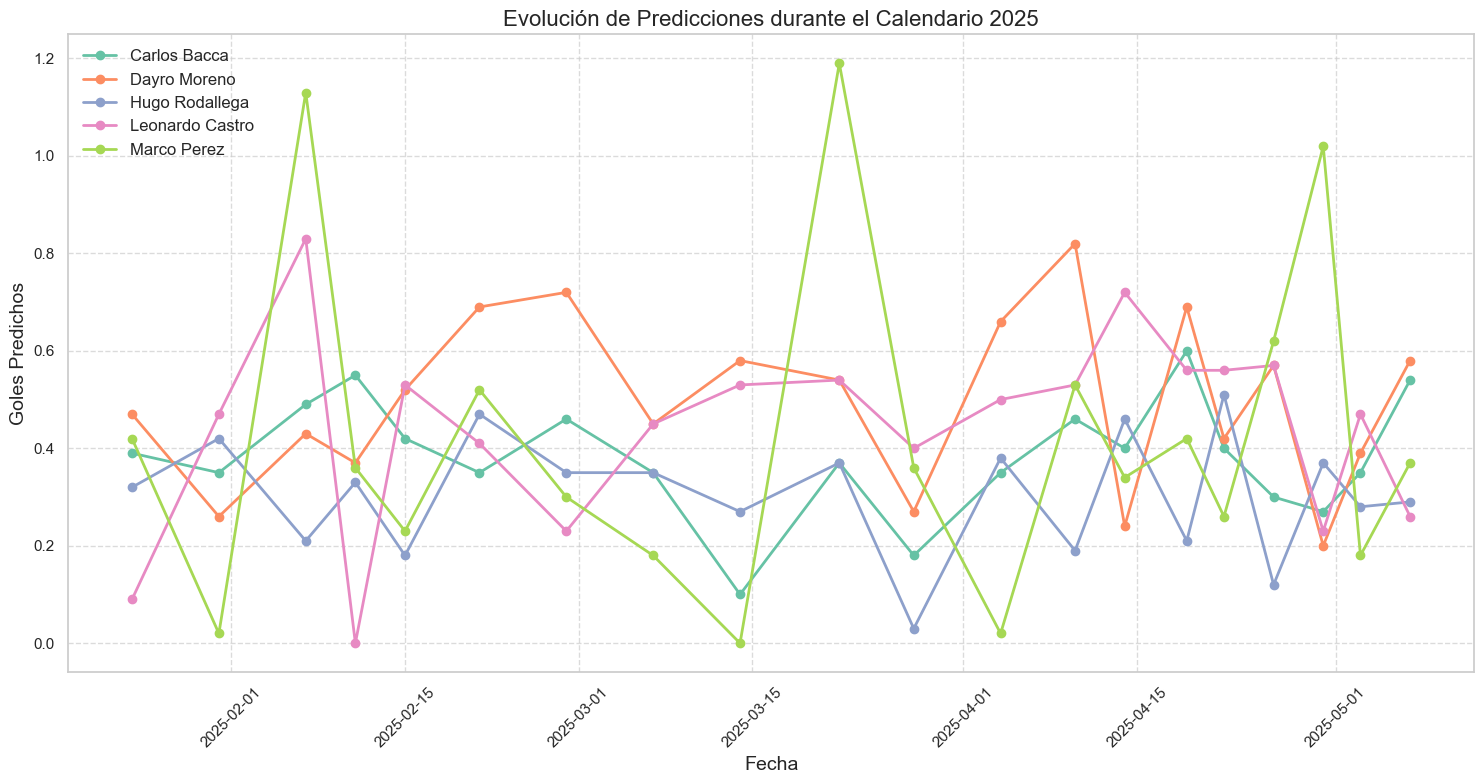

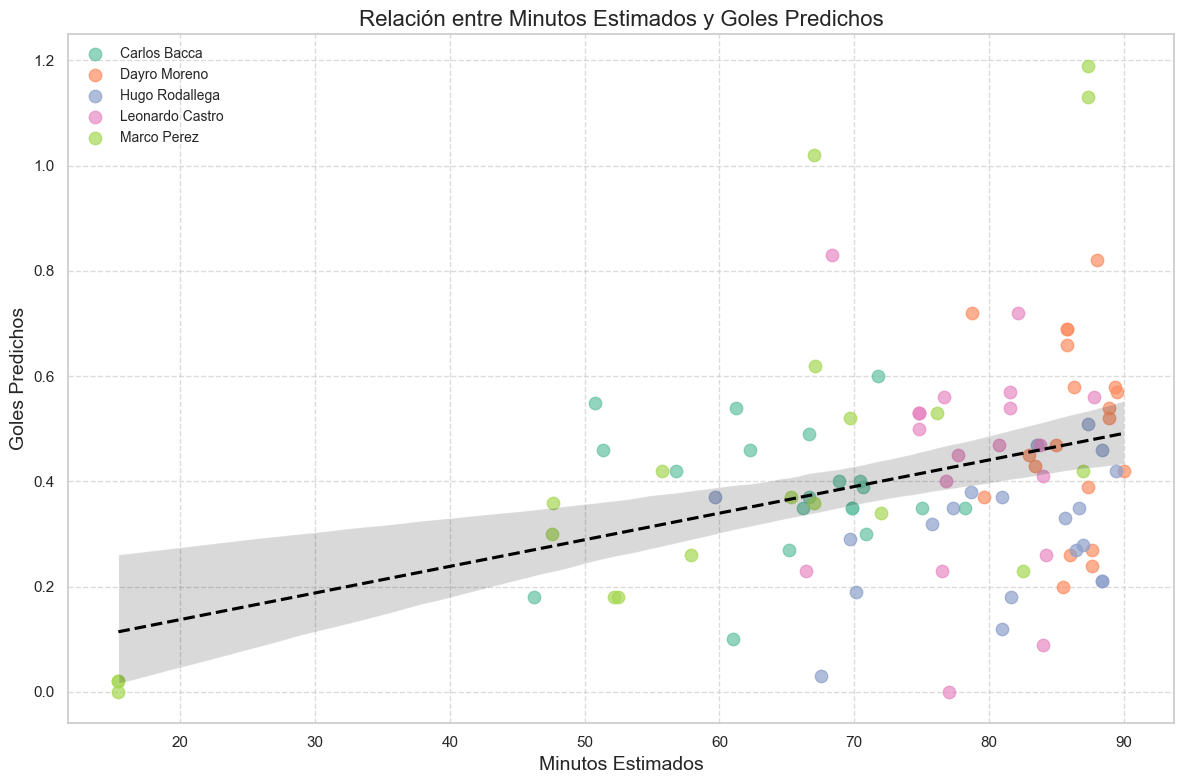

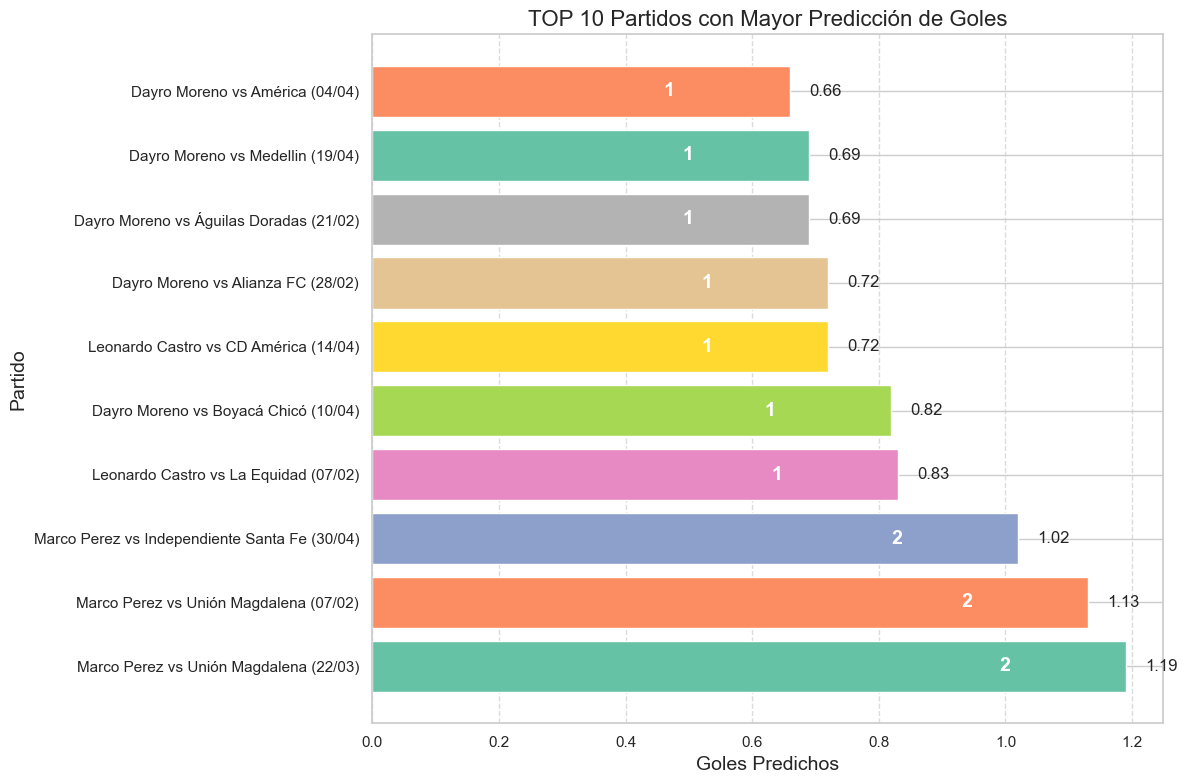

Visualizaciones completadas.


In [18]:
# Análisis gráfico de predicciones ARIMAX
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configurar estilo de gráficos
plt.style.use('ggplot')
sns.set(style="whitegrid")
colors = sns.color_palette("Set2", 10)

print("Generando visualizaciones de las predicciones ARIMAX...")

# Cargar el archivo de predicciones
predicciones = pd.read_csv("predicciones_calendario_2025.csv")

# Convertir fecha a formato datetime
predicciones['Fecha'] = pd.to_datetime(predicciones['Fecha'])

# 1. GRÁFICO: Distribución de goles predichos por jugador (boxplot)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Jugador', y='Goles_Predichos', data=predicciones, palette="Set2")
plt.title('Distribución de Goles Predichos por Jugador (ARIMAX)', fontsize=16)
plt.ylabel('Goles Predichos', fontsize=14)
plt.xlabel('Jugador', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. GRÁFICO: Mapa de calor de rendimiento contra cada oponente
rendimiento_por_equipo = predicciones.pivot_table(
    index='Jugador', 
    columns='Oponente',
    values='Goles_Predichos',
    aggfunc='mean'
).round(2)

plt.figure(figsize=(16, 10))
sns.heatmap(rendimiento_por_equipo, annot=True, cmap='YlGnBu', linewidths=0.5, fmt='.2f')
plt.title('Promedio de Goles Predichos por Jugador contra cada Oponente', fontsize=16)
plt.xlabel('Oponente', fontsize=14)
plt.ylabel('Jugador', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. GRÁFICO: Comparación Local vs Visitante
rendimiento_localvisitante = predicciones.pivot_table(
    index='Jugador',
    columns='Juega_Local',
    values='Goles_Predichos',
    aggfunc='mean'
).round(2)

rendimiento_localvisitante = rendimiento_localvisitante.rename(columns={True: 'Local', False: 'Visitante'})
rendimiento_localvisitante['Diferencia'] = (rendimiento_localvisitante['Local'] - rendimiento_localvisitante['Visitante']).round(2)

plt.figure(figsize=(14, 7))
rendimiento_localvisitante[['Local', 'Visitante']].plot(kind='bar', color=[colors[0], colors[1]])
plt.title('Comparación de Rendimiento: Local vs Visitante', fontsize=16)
plt.ylabel('Goles Predichos', fontsize=14)
plt.xlabel('Jugador', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# 4. GRÁFICO: Proyección del total de goles por jugador
# Aplicar diferentes métodos de redondeo para calcular goles totales
predicciones['Goles_Redondeados'] = np.round(predicciones['Goles_Predichos']).astype(int)
predicciones['Goles_Truncados'] = np.floor(predicciones['Goles_Predichos']).astype(int)

# Calcular totales por jugador
totales_por_jugador = predicciones.groupby('Jugador').agg({
    'Goles_Predichos': 'sum',
    'Goles_Redondeados': 'sum',
    'Goles_Truncados': 'sum'
}).round(1)

# Ordenar por total de goles redondeados
totales_por_jugador = totales_por_jugador.sort_values('Goles_Redondeados', ascending=False)

plt.figure(figsize=(14, 8))
totales_por_jugador.plot(kind='bar', color=[colors[2], colors[3], colors[4]])
plt.title('Proyección de Goles Totales por Jugador en el Calendario 2025', fontsize=16)
plt.ylabel('Goles Totales', fontsize=14)
plt.xlabel('Jugador', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Suma Exacta', 'Redondeados', 'Truncados'], fontsize=12)

# Añadir etiquetas con el número total de goles redondeados
for i, v in enumerate(totales_por_jugador['Goles_Redondeados']):
    plt.text(i, v + 0.5, f"{int(v)}", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# 5. GRÁFICO: Número máximo de goles por jugador (entero)
# Calcular máximo de goles por partido para cada jugador
max_goles_por_jugador = predicciones.groupby('Jugador')['Goles_Predichos'].max().reset_index()
max_goles_por_jugador['Goles_Max_Entero'] = np.ceil(max_goles_por_jugador['Goles_Predichos']).astype(int)
max_goles_por_jugador = max_goles_por_jugador.sort_values('Goles_Max_Entero', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(max_goles_por_jugador['Jugador'], max_goles_por_jugador['Goles_Max_Entero'], 
              color=[colors[i % len(colors)] for i in range(len(max_goles_por_jugador))])

# Añadir etiquetas con valores exactos y redondeados
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f"{int(max_goles_por_jugador['Goles_Max_Entero'].iloc[i])}", 
             ha='center', fontsize=14, fontweight='bold')
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.3, 
             f"({max_goles_por_jugador['Goles_Predichos'].iloc[i]:.2f})", 
             ha='center', fontsize=10, color='darkblue')

plt.title('Máximo de Goles por Partido para cada Jugador (Entero)', fontsize=16)
plt.ylabel('Número Máximo de Goles', fontsize=14)
plt.xlabel('Jugador', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max_goles_por_jugador['Goles_Max_Entero'].max() + 1)
plt.tight_layout()
plt.show()

# 6. GRÁFICO: Evolución temporal de predicciones
plt.figure(figsize=(15, 8))
for i, jugador in enumerate(predicciones['Jugador'].unique()):
    subset = predicciones[predicciones['Jugador'] == jugador]
    plt.plot(subset['Fecha'], subset['Goles_Predichos'], 'o-', 
             linewidth=2, markersize=6, label=jugador, color=colors[i % len(colors)])

plt.title('Evolución de Predicciones durante el Calendario 2025', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Goles Predichos', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. GRÁFICO: Relación entre Minutos Estimados y Goles Predichos
plt.figure(figsize=(12, 8))
for i, jugador in enumerate(predicciones['Jugador'].unique()):
    subset = predicciones[predicciones['Jugador'] == jugador]
    plt.scatter(subset['Minutos_Estimados'], subset['Goles_Predichos'], 
                s=80, label=jugador, alpha=0.7, color=colors[i % len(colors)])

# Añadir línea de tendencia general
sns.regplot(x='Minutos_Estimados', y='Goles_Predichos', data=predicciones,
            scatter=False, color='black', line_kws={"linestyle": "--"})

plt.title('Relación entre Minutos Estimados y Goles Predichos', fontsize=16)
plt.xlabel('Minutos Estimados', fontsize=14)
plt.ylabel('Goles Predichos', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10, loc='best')
plt.tight_layout()
plt.show()

# 8. GRÁFICO: TOP partidos con mayor probabilidad de gol
top_partidos = predicciones.sort_values('Goles_Predichos', ascending=False).head(10)
top_partidos['Partido'] = top_partidos['Jugador'] + ' vs ' + top_partidos['Oponente'] + ' (' + top_partidos['Fecha'].dt.strftime('%d/%m') + ')'

plt.figure(figsize=(12, 8))
bars = plt.barh(top_partidos['Partido'], top_partidos['Goles_Predichos'], 
               color=[colors[i % len(colors)] for i in range(len(top_partidos))])

# Añadir etiquetas con valores
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.03, bar.get_y() + bar.get_height()/2, 
             f"{top_partidos['Goles_Predichos'].iloc[i]:.2f}", 
             va='center', fontsize=12)
    plt.text(bar.get_width() - 0.2, bar.get_y() + bar.get_height()/2, 
             f"{int(np.ceil(top_partidos['Goles_Predichos'].iloc[i]))}", 
             va='center', fontsize=14, fontweight='bold', color='white')

plt.title('TOP 10 Partidos con Mayor Predicción de Goles', fontsize=16)
plt.xlabel('Goles Predichos', fontsize=14)
plt.ylabel('Partido', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Visualizaciones completadas.")